# Diane Rodden
## BIOS 512
### Assignment 2

In [113]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [114]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

In [115]:
# set options
library(repr) 
options(repr.plot.width=16, repr.plot.height=12) 


In [116]:
# create a combined 1952/2002 data set
df.both = gapminder %>% filter((year == 1952) | (year == 2002))


# remove factors
df.both  %>% mutate_if(is.factor, as.character) -> nfdf.both

# preview data set
head(nfdf.both)

class(nfdf.both$country)

country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,2002,42.129,25268405,726.7341
Albania,Europe,1952,55.230,1282697,1601.0561
Albania,Europe,2002,75.651,3508512,4604.2117
Algeria,Africa,1952,43.077,9279525,2449.0082
Algeria,Africa,2002,70.994,31287142,5288.0404


[1] "character"

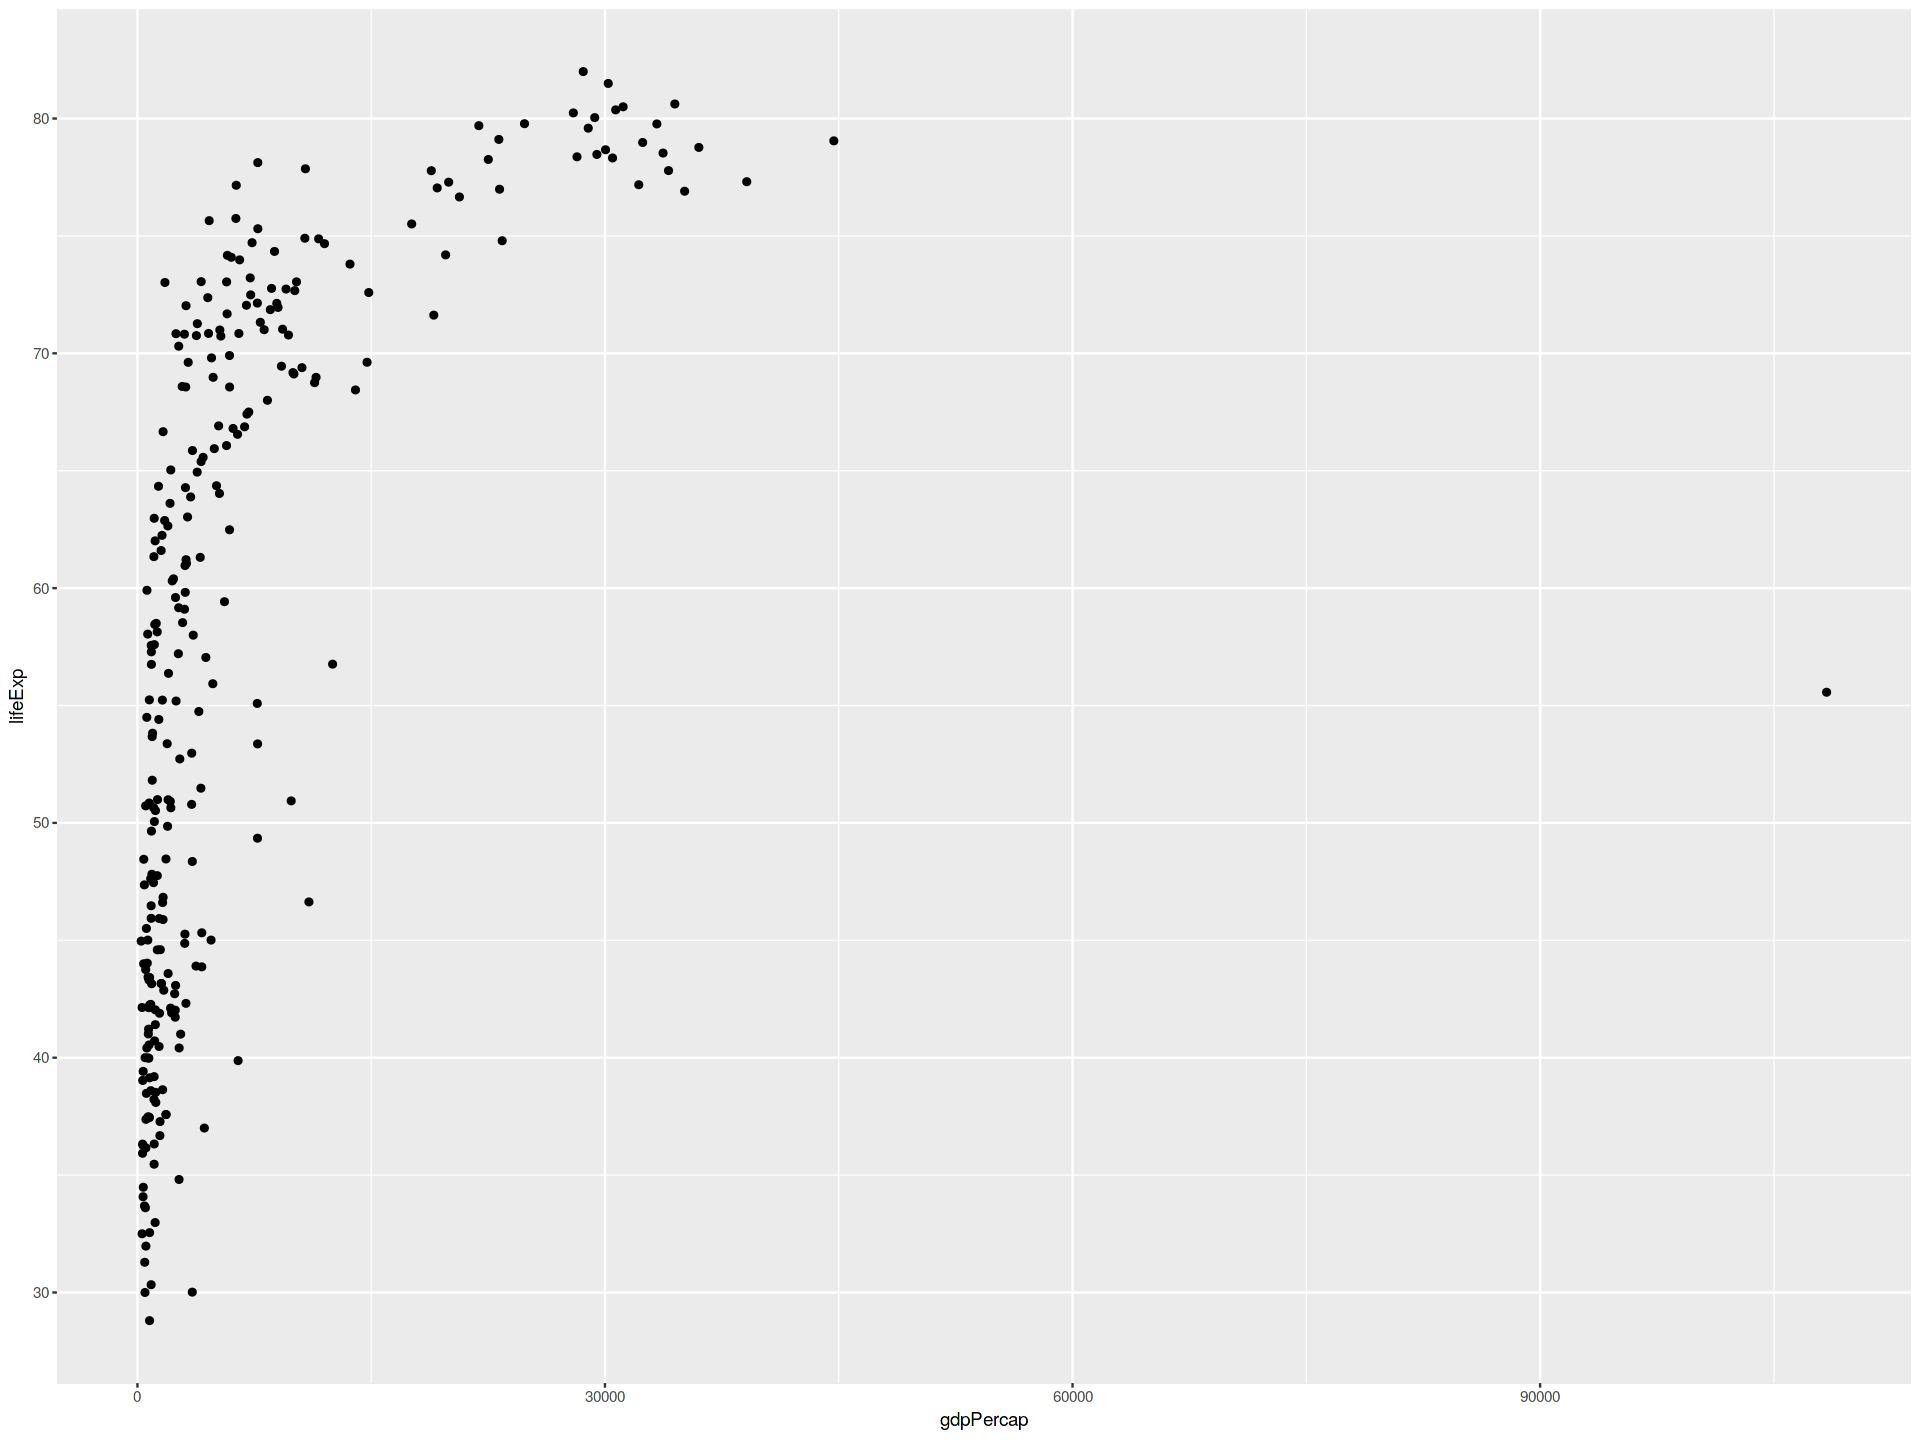

In [117]:
# create basic geom
p = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, label=country))
p = p + geom_point()
p

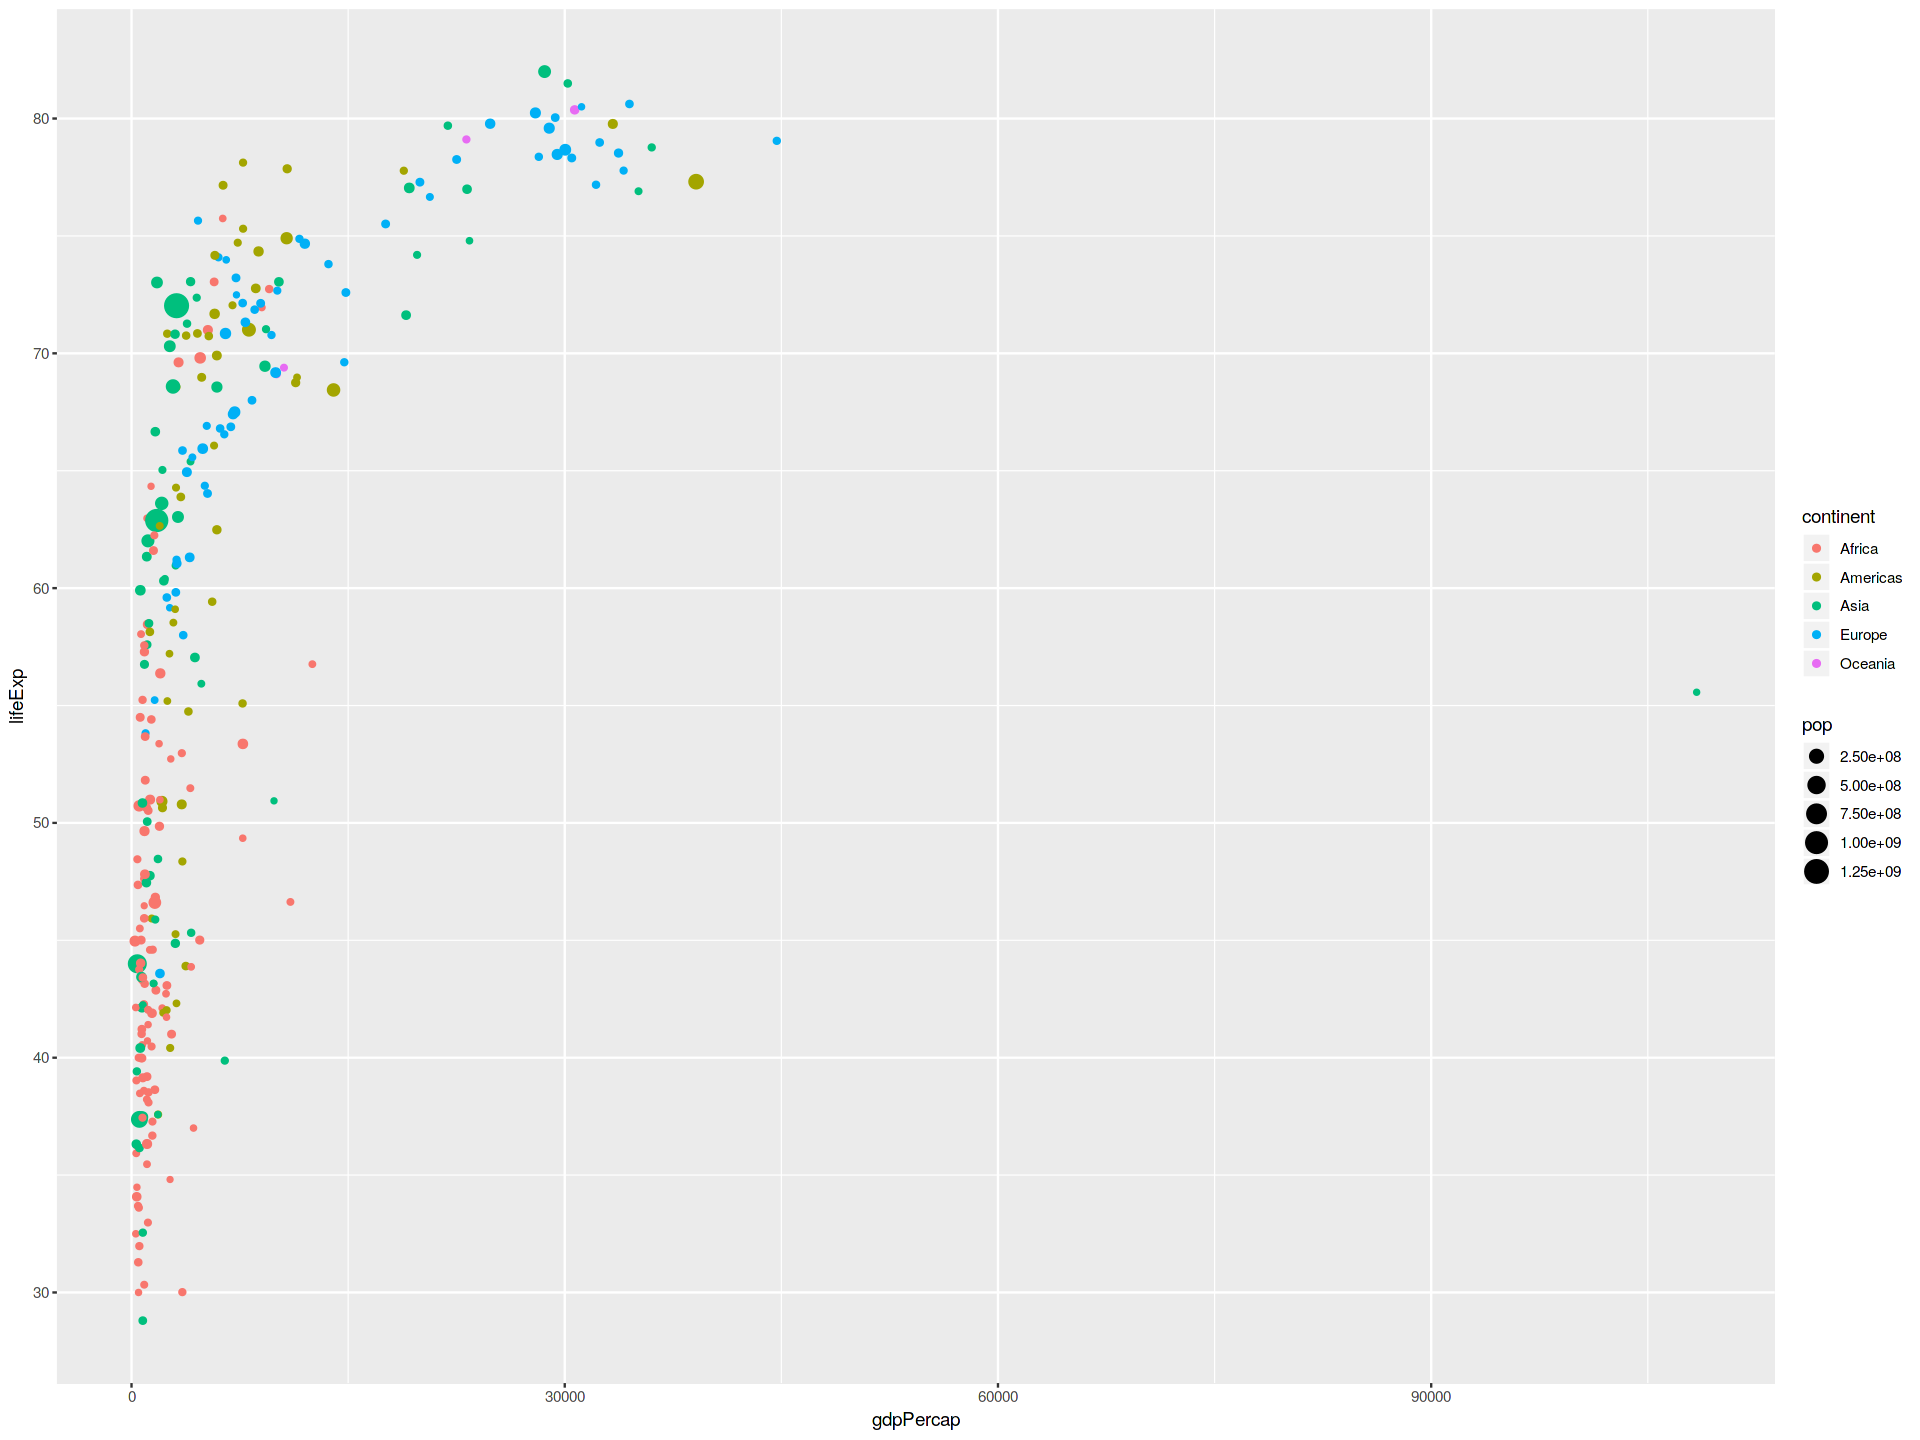

In [118]:
# color points by continent and size points by population
p = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p = p + geom_point()
p

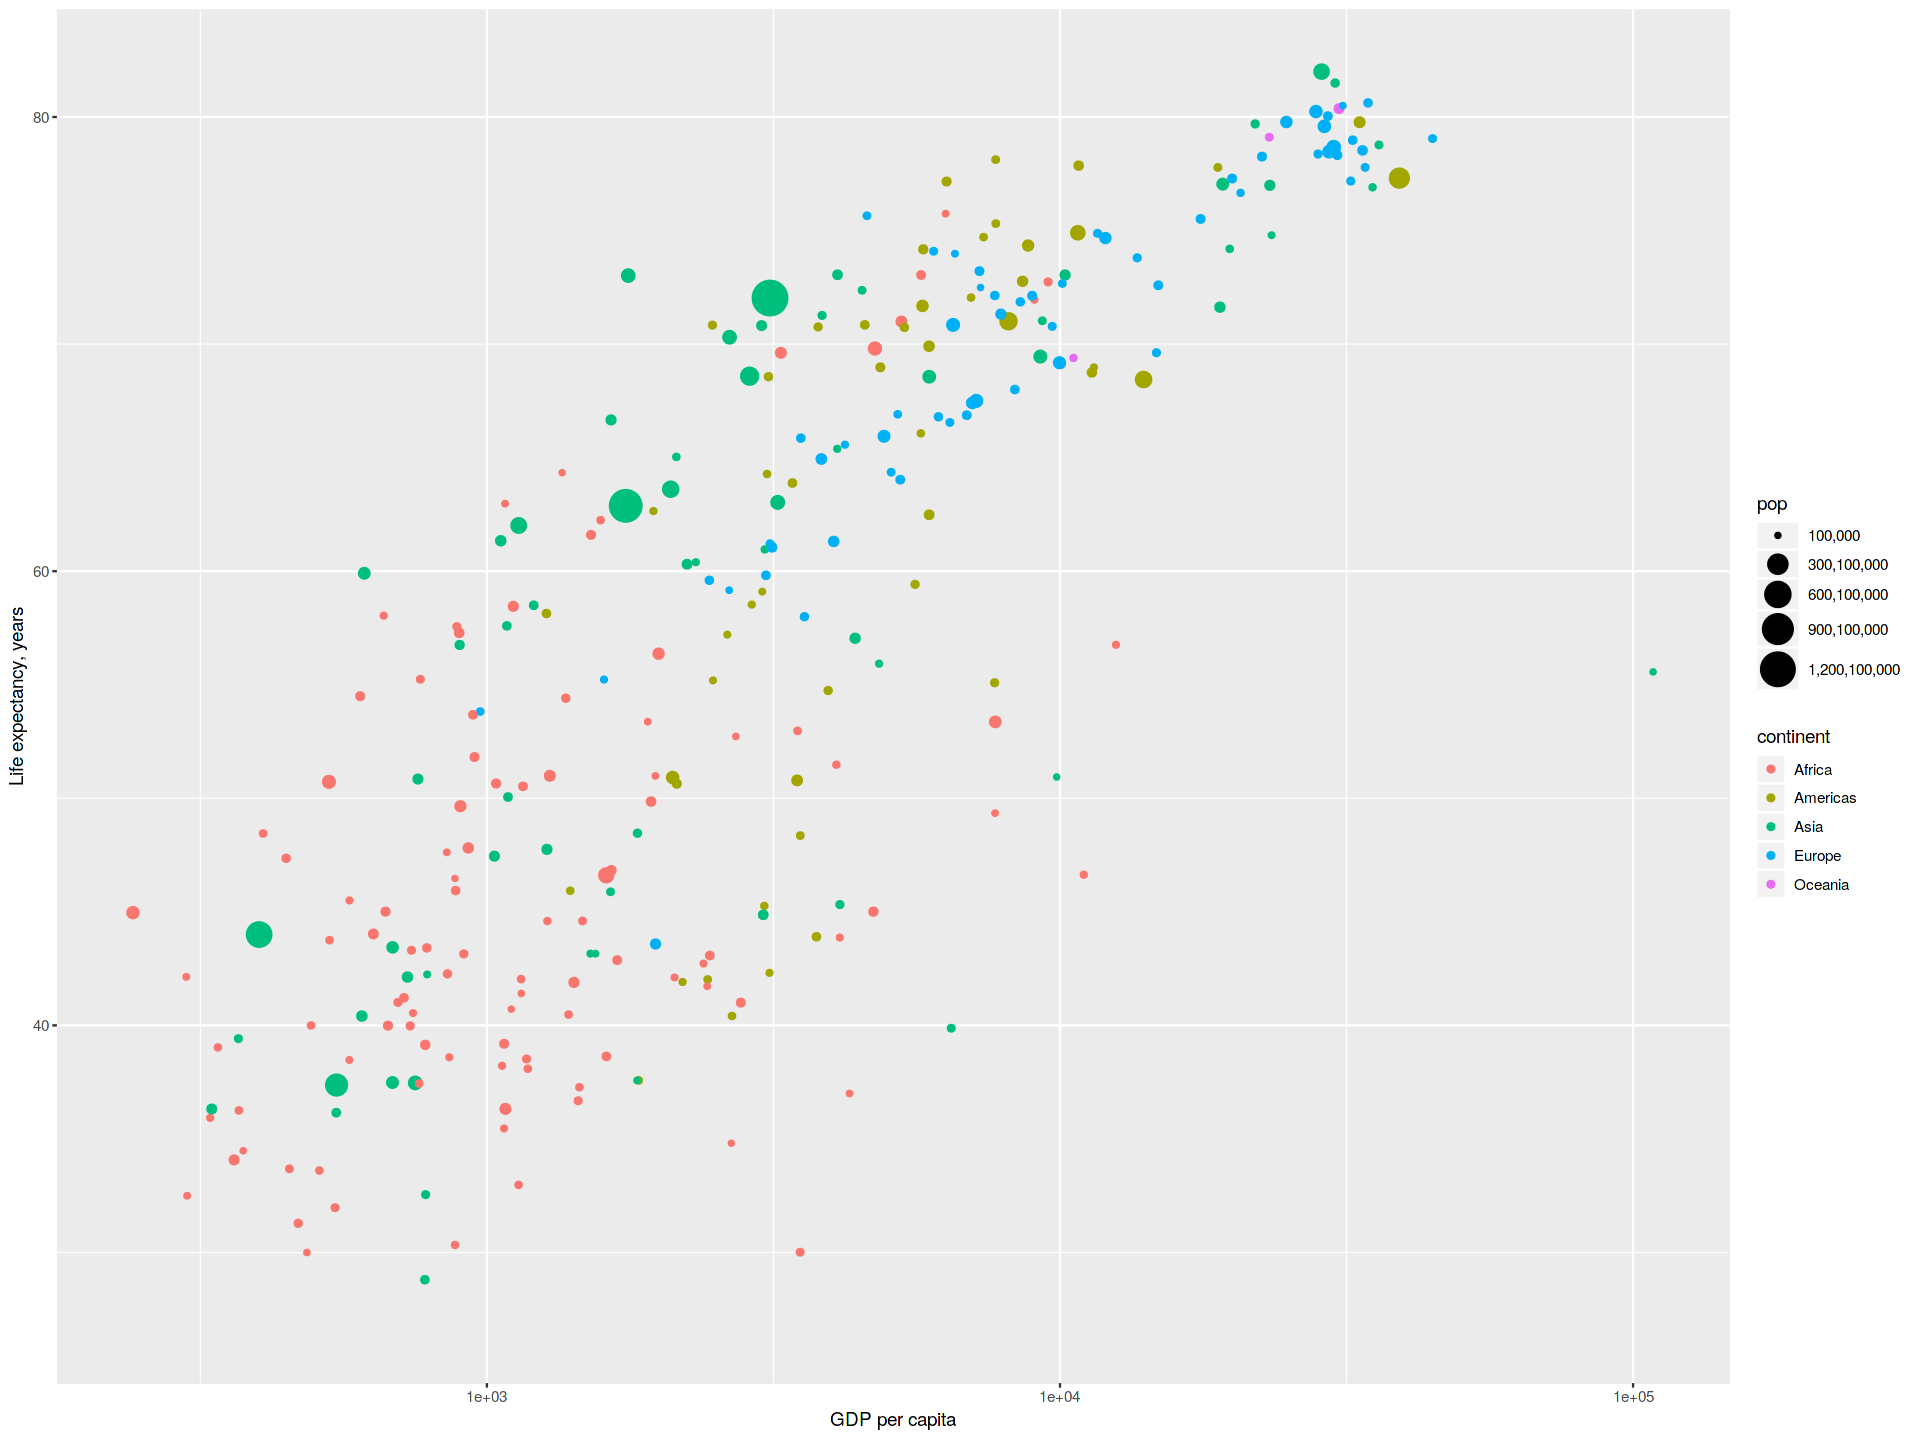

In [119]:
# set scales like in the example
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

# fix the y-axis by setting a range
p = p + ylim(c(27, 82))


# set the x-axis to a log-scale
p = p + scale_x_log10()



# customize the x axis and y axis labels
p = p + labs(x = "GDP per capita", y = "Life expectancy, years")
p

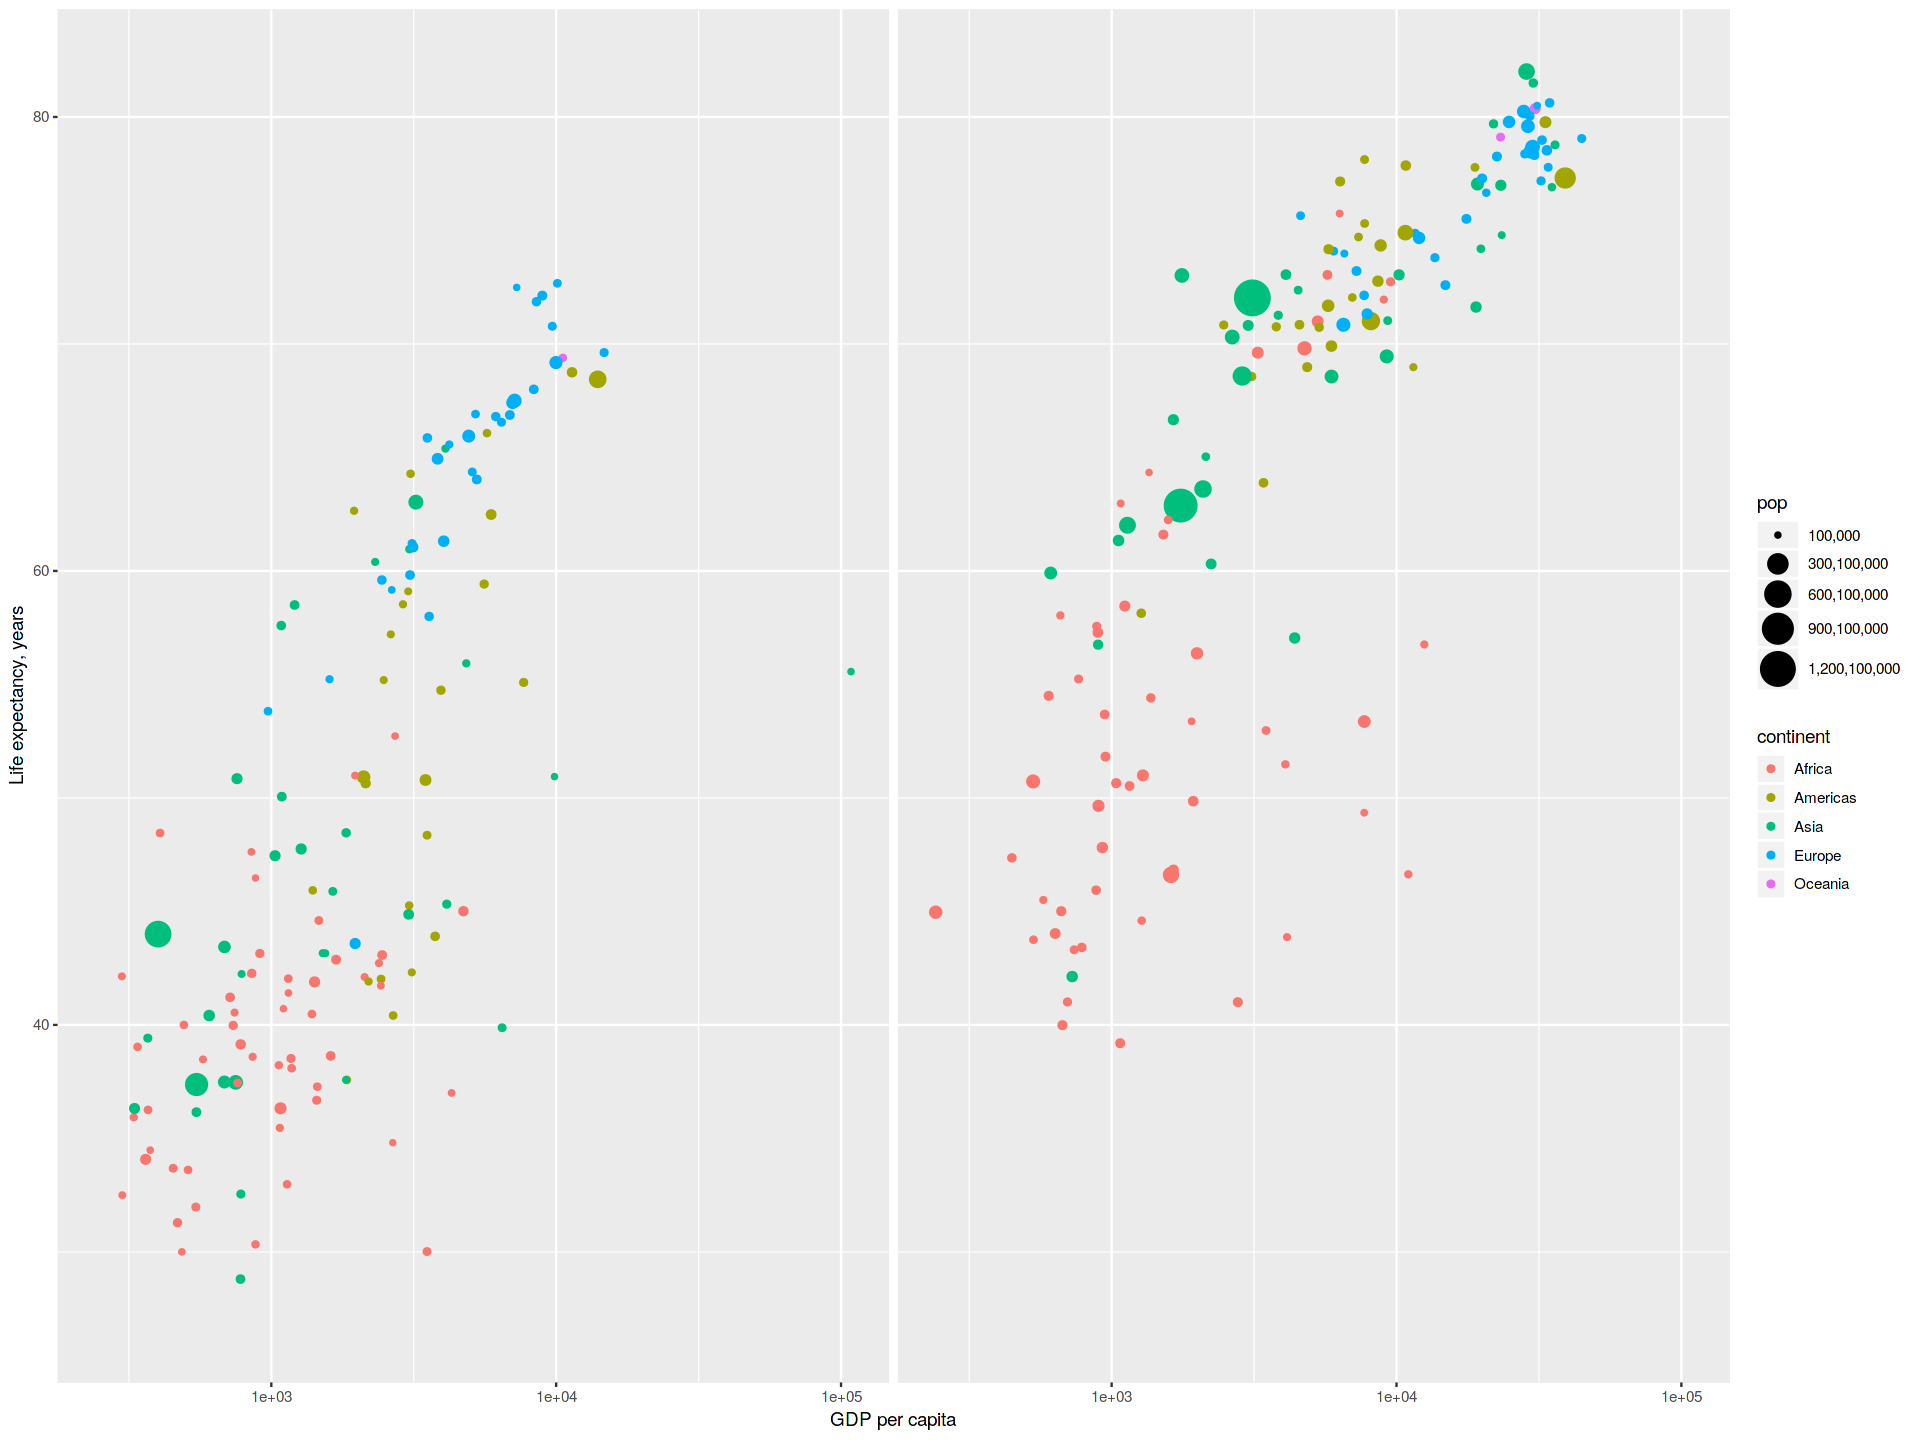

In [120]:
# add facet wrap by year
p = p + facet_wrap(~year, nrow=1) + theme(strip.background = element_blank(),
  strip.text.x = element_blank())
p

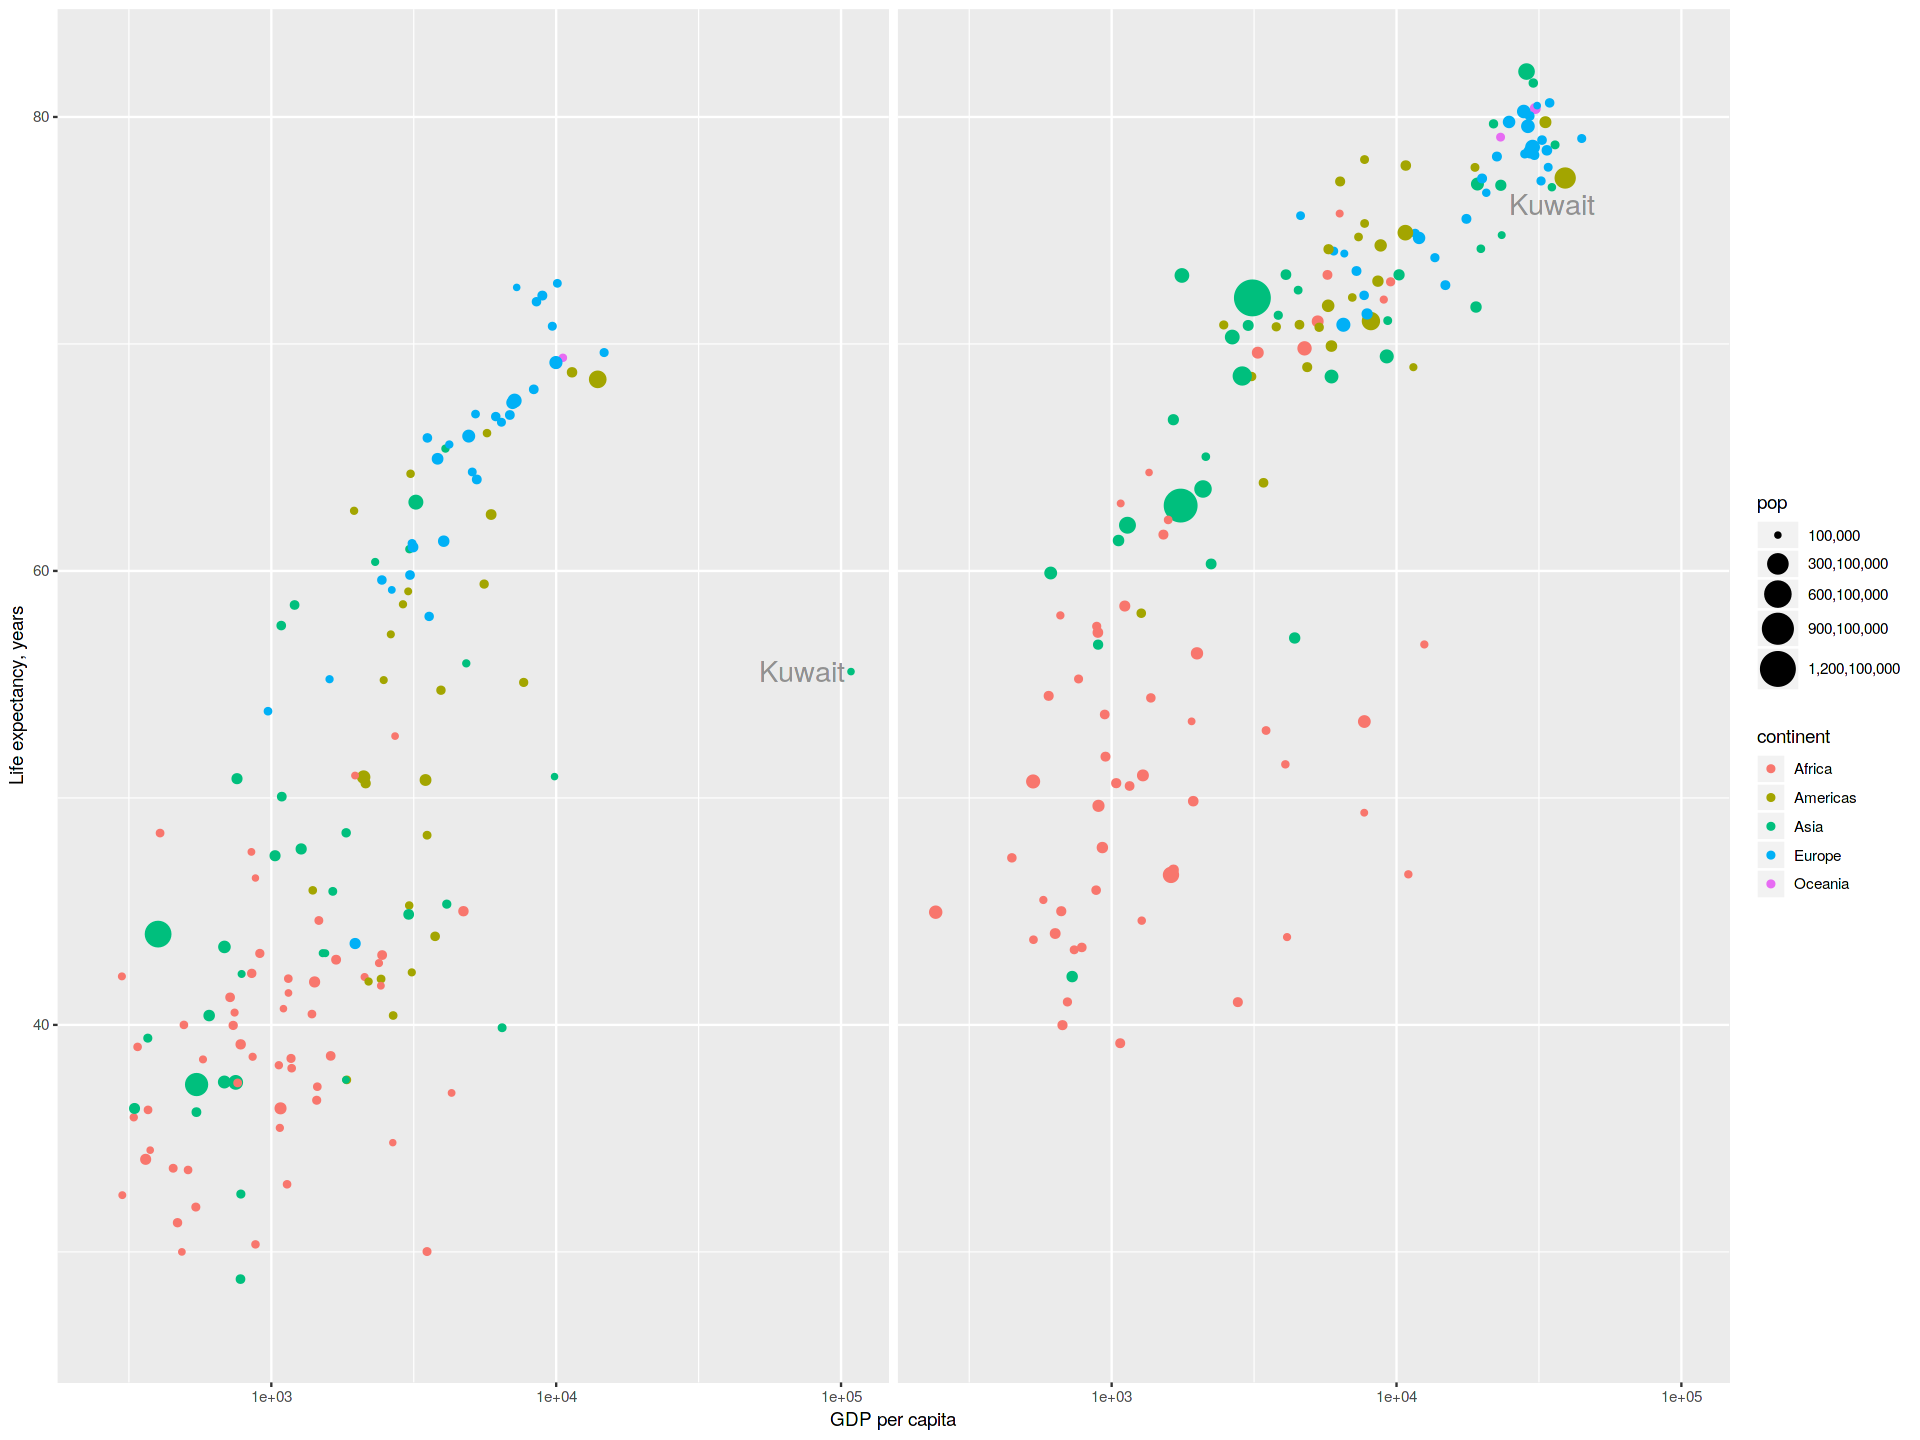

In [121]:
# improve geom to label Kuwait by adding text repel
p = p + geom_text_repel(aes(label=ifelse(nfdf.both$country == "Kuwait",nfdf.both$country,'')), 
                        size= 6, segment.size = 5, segment.color = 'gray57', color='gray57', show.legend=FALSE)
p = p + theme(strip.background = element_blank(), strip.text.x = element_blank() )
p


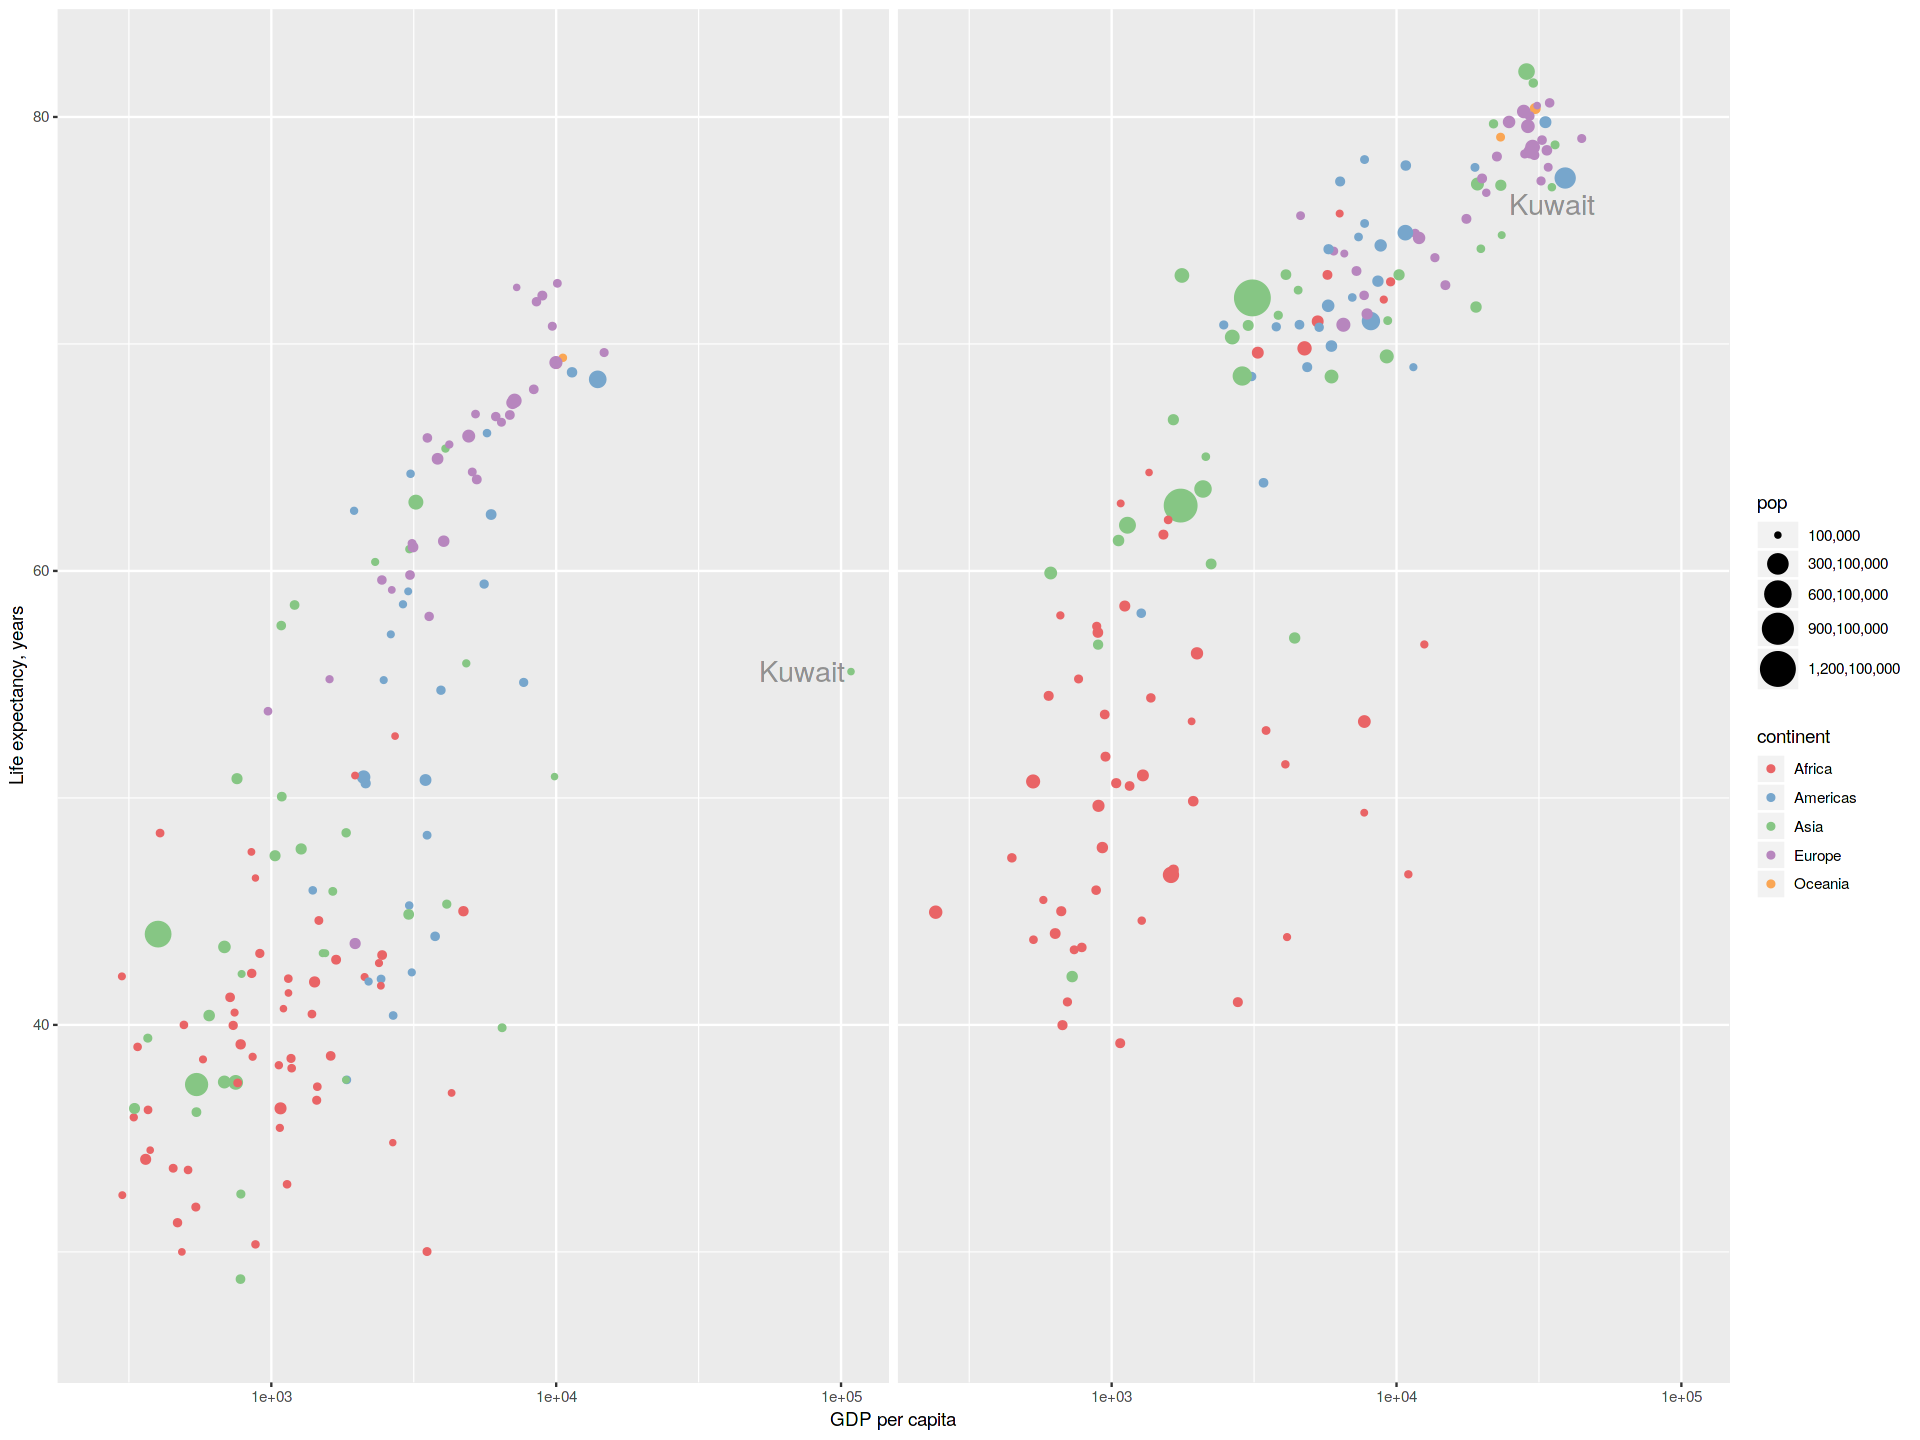

In [122]:
# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654




p = p + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))
p

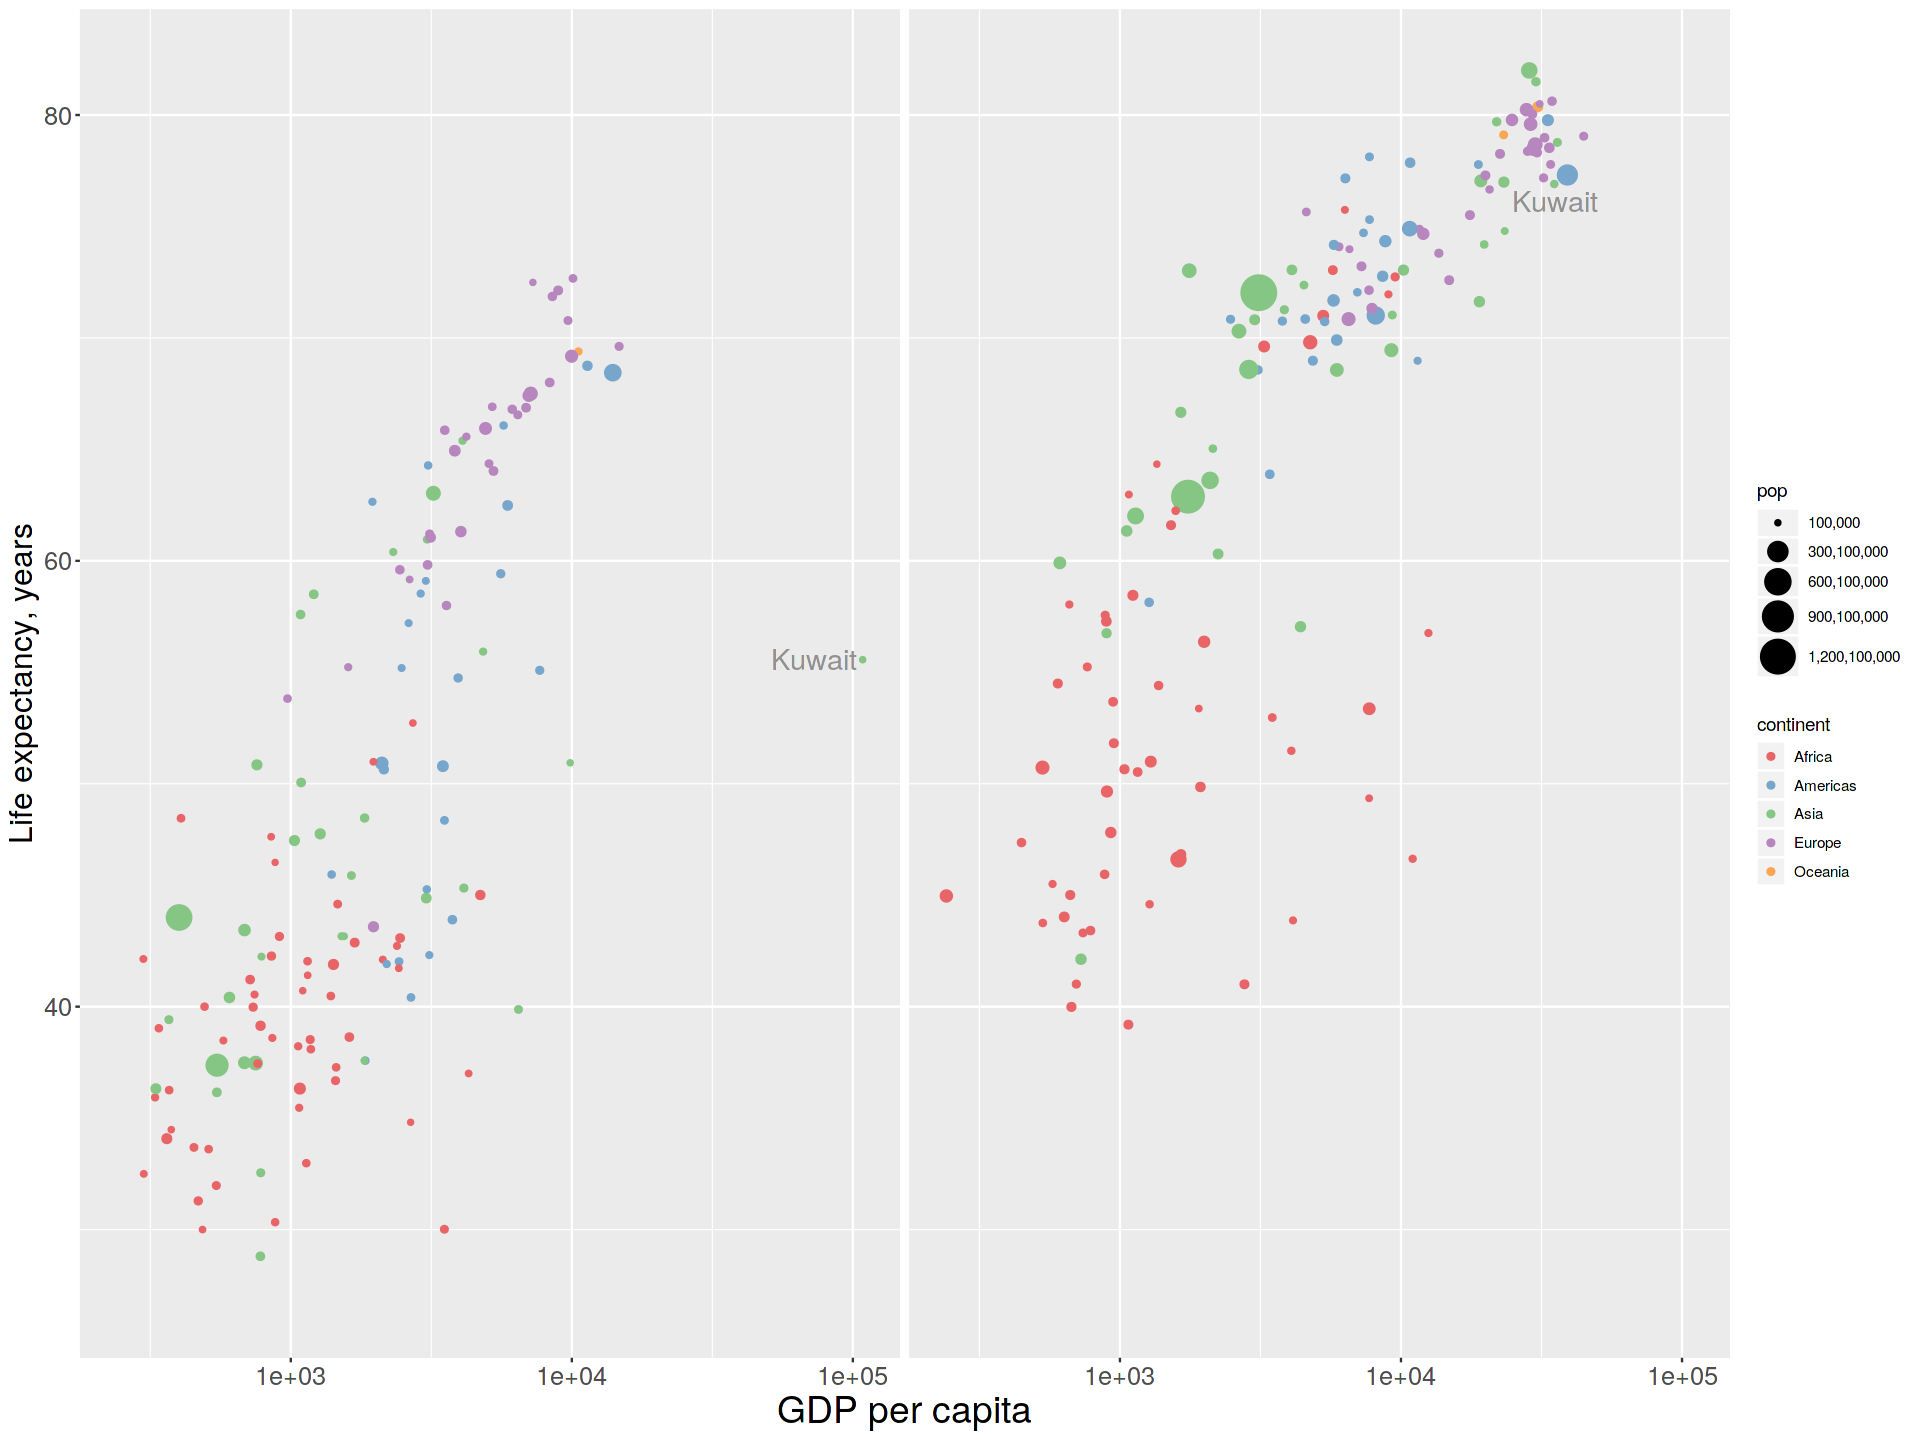

In [123]:
# increase axis titles

p = p + theme(axis.title.y = element_text(size = rel(1.7), angle = 90))
p = p + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))



# increase size of the text on the labels
p = p + theme(axis.text.x = element_text(size = rel(1.7), angle = 0))
p = p + theme(axis.text.y = element_text(size = rel(1.7), angle = 0))
p

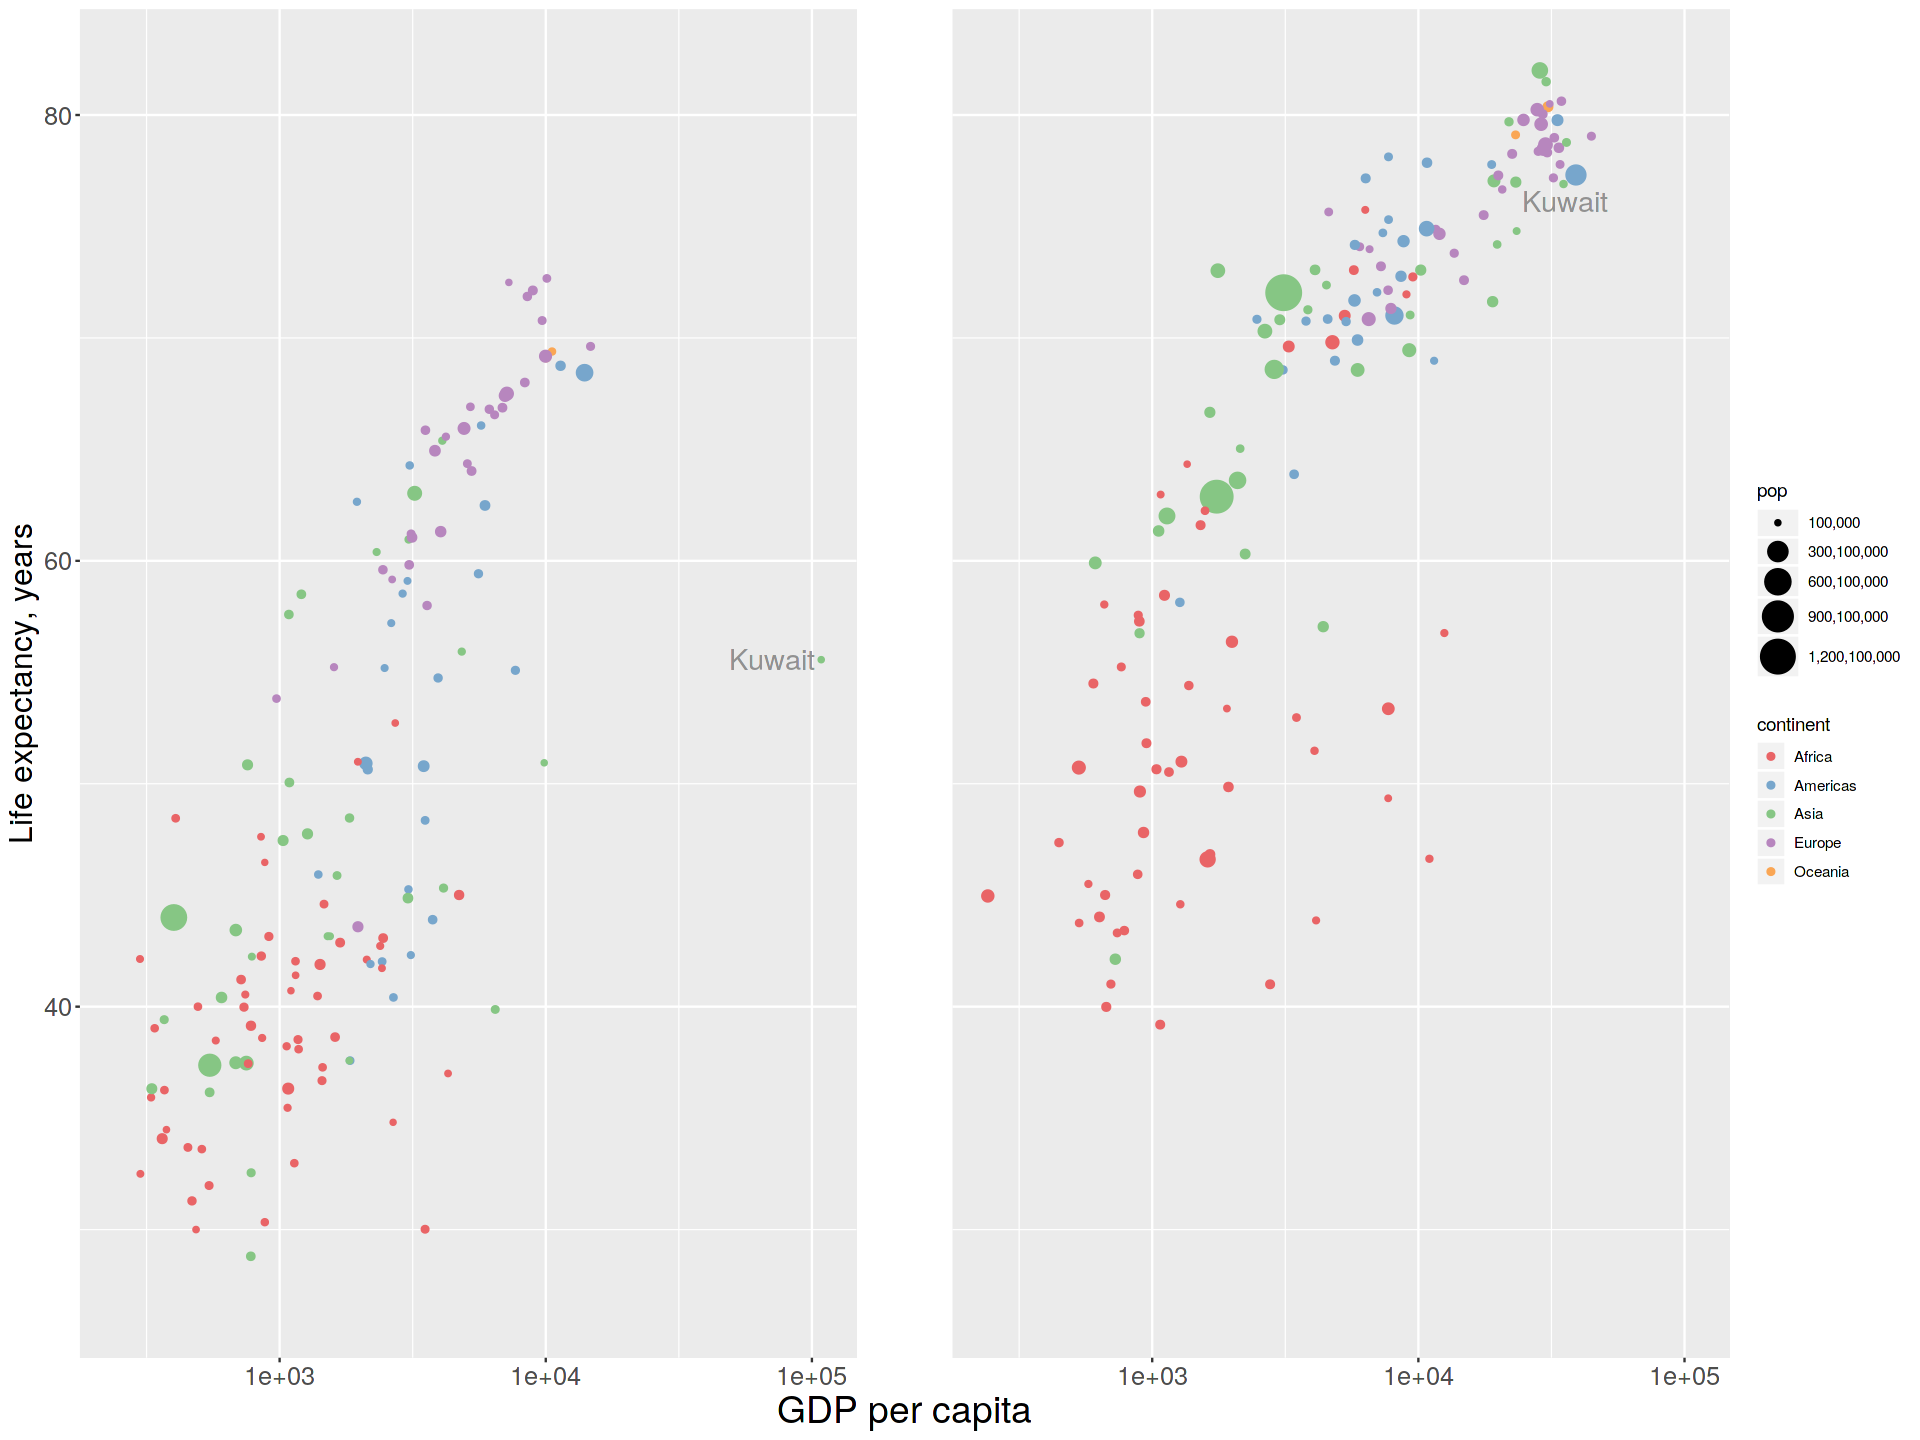

In [124]:
# increase space between panels
p = p + theme(panel.spacing = unit(4, "lines"))
p

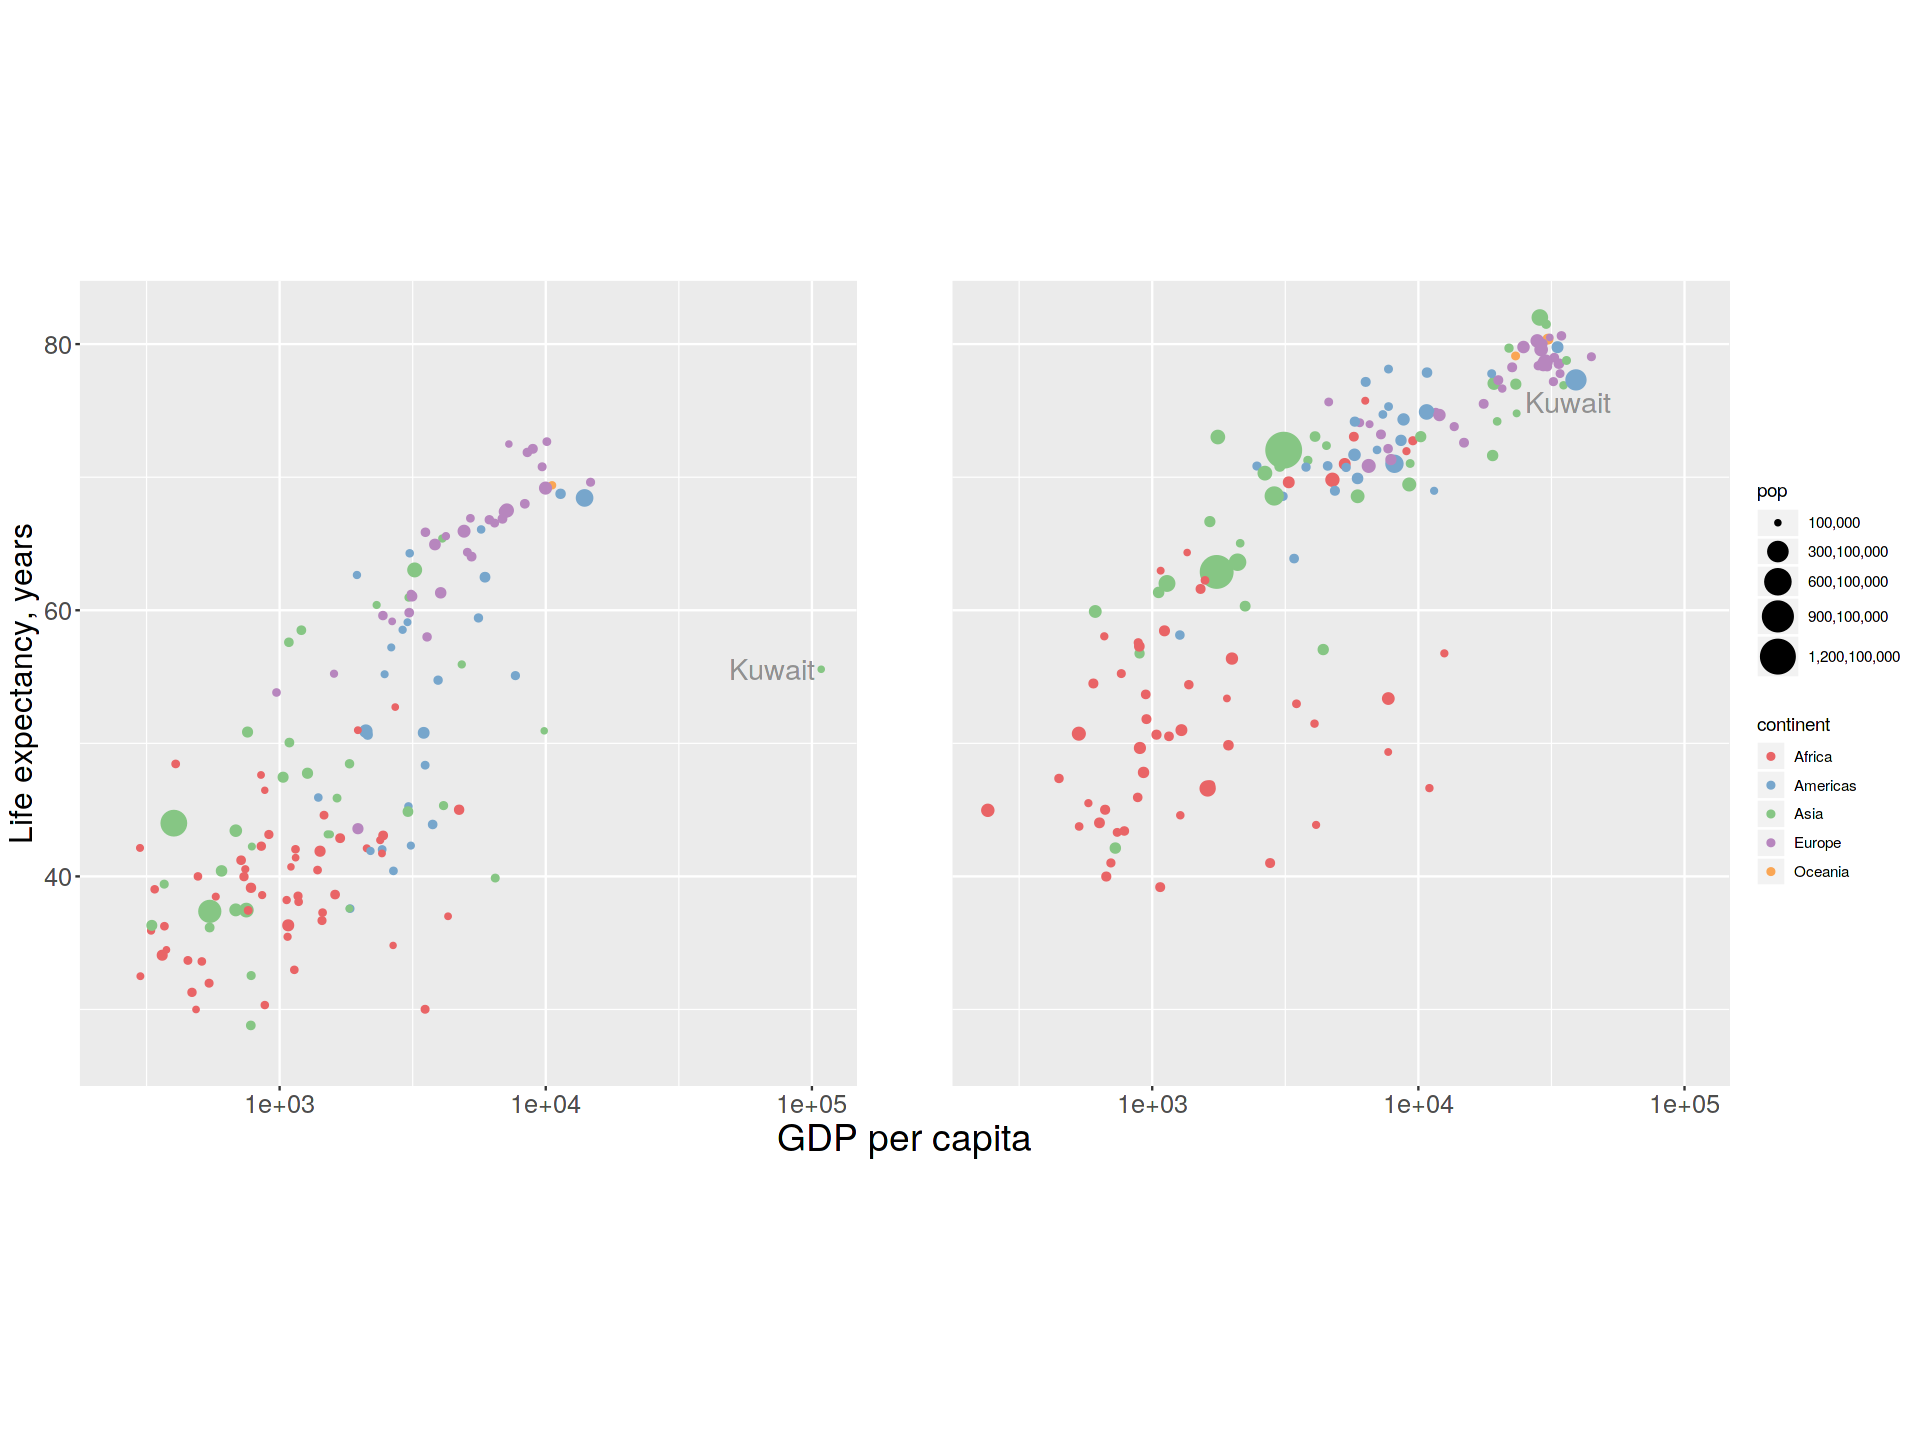

In [125]:
# fix aspect ratio to make square plots

p = p + coord_fixed(ratio = 1/20)
p

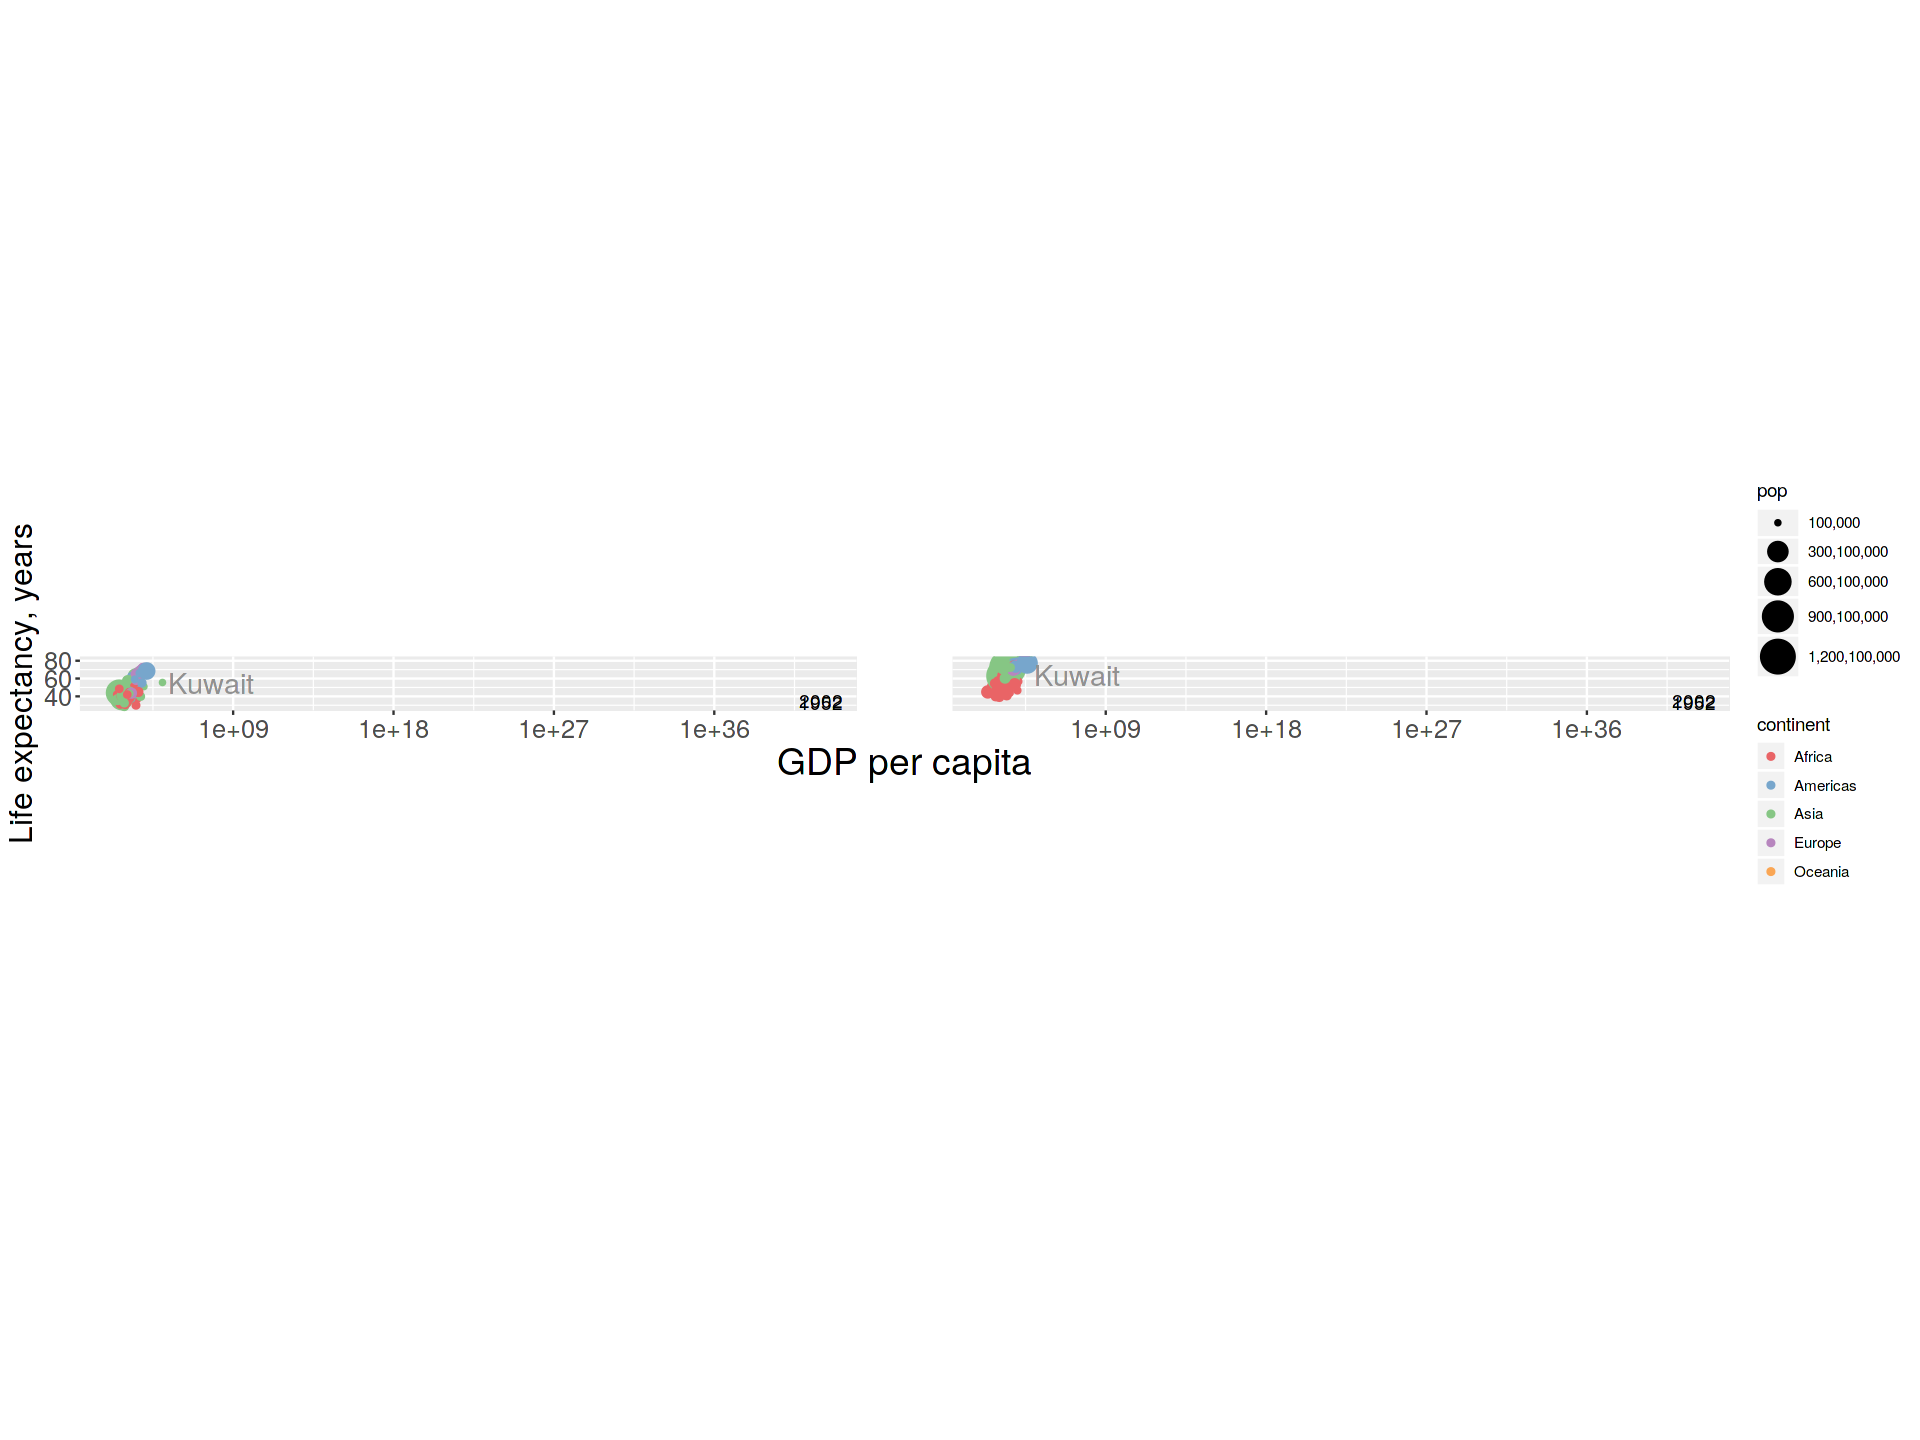

In [126]:
# add year (but doesn't work very well with faceted)

p1 = p + annotate("text", x = 1e+042, y = 32, label = "1952")


p1 = p1 + annotate("text", x = 1e+042, y = 35, label = "2002")
p1


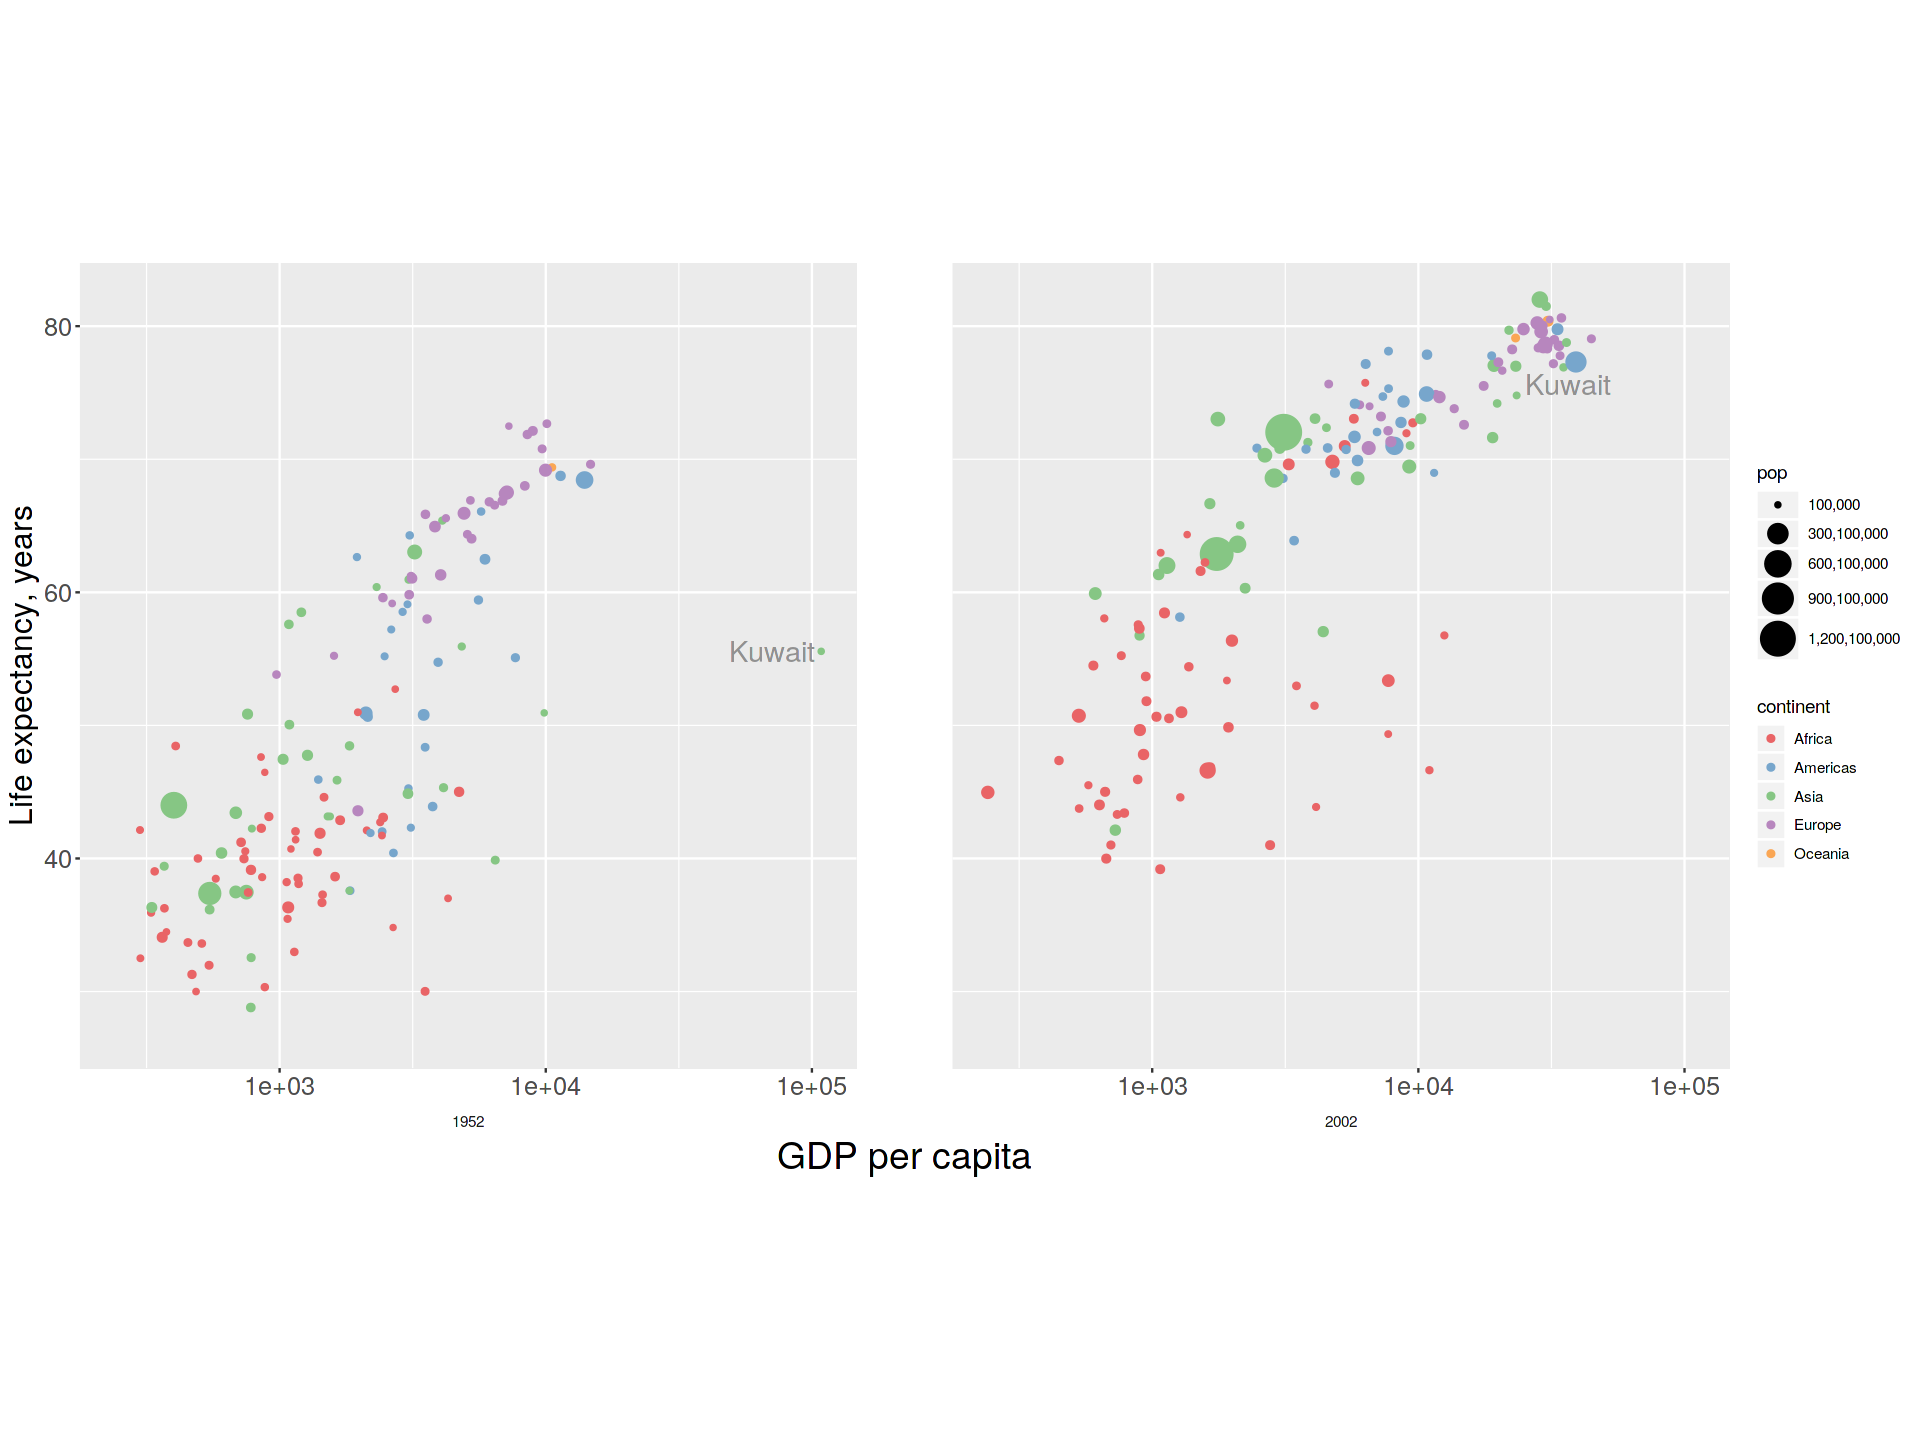

In [127]:
# so  make a different plot and just include the year as a legend at the bottom when performing the facet wrap
# even if that is not like the example

# create basic geom
p2 = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, label=country))
p2 = p2 + geom_point()



# color points by continent and size points by population
p2 = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p2 = p2 + geom_point()


# set scales like in the example
p2 = p2 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)



# fix the y-axis by setting a range
p2 = p2 + ylim(c(27, 82))



# set the x-axis to a log-scale
p2 = p2 + scale_x_log10()



# customize the x axis and y axis labels
p2 = p2 + labs(x = "GDP per capita", y = "Life expectancy, years")




# improve geom to label Kuwait by adding text repel
p2 = p2 + geom_text_repel(aes(label=ifelse(nfdf.both$country == "Kuwait",nfdf.both$country,'')), 
                        size= 6, segment.size = 5, segment.color = 'gray57', color='gray57', show.legend=FALSE)
p2 = p2 + theme(strip.background = element_blank())



# add facet wrap by year
p2 = p2 + facet_wrap(~year, nrow=1, strip.position = 'bottom') + theme(strip.background = element_blank(),
  strip.placement = 'outside')




# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654



# add colors for points
p2 = p2 + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))




# increase axis titles

p2 = p2 + theme(axis.title.y = element_text(size = rel(1.7), angle = 90))
p2 = p2 + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))



# increase size of the text on the labels
p2 = p2 + theme(axis.text.x = element_text(size = rel(1.7), angle = 0))
p2 = p2 + theme(axis.text.y = element_text(size = rel(1.7), angle = 0))



# increase space between panels
p2 = p2 + theme(panel.spacing = unit(4, "lines"))



# fix aspect ratio to make square plots

p2 = p2 + coord_fixed(ratio = 1/20)
p2





In [128]:
# a better solution might have been to make 2 geoms and display them side by side

# remove factors
df.1952  %>% mutate_if(is.factor, as.character) -> nfdf.1952
df.2002  %>% mutate_if(is.factor, as.character) -> nfdf.2002


# create basic geoms
p1952 = ggplot(nfdf.1952, aes(x = gdpPercap, y = lifeExp, label=country))
p1952 = p1952 + geom_point()




p2002 = ggplot(nfdf.2002, aes(x = gdpPercap, y = lifeExp, label=country))
p2002 = p2002 + geom_point()




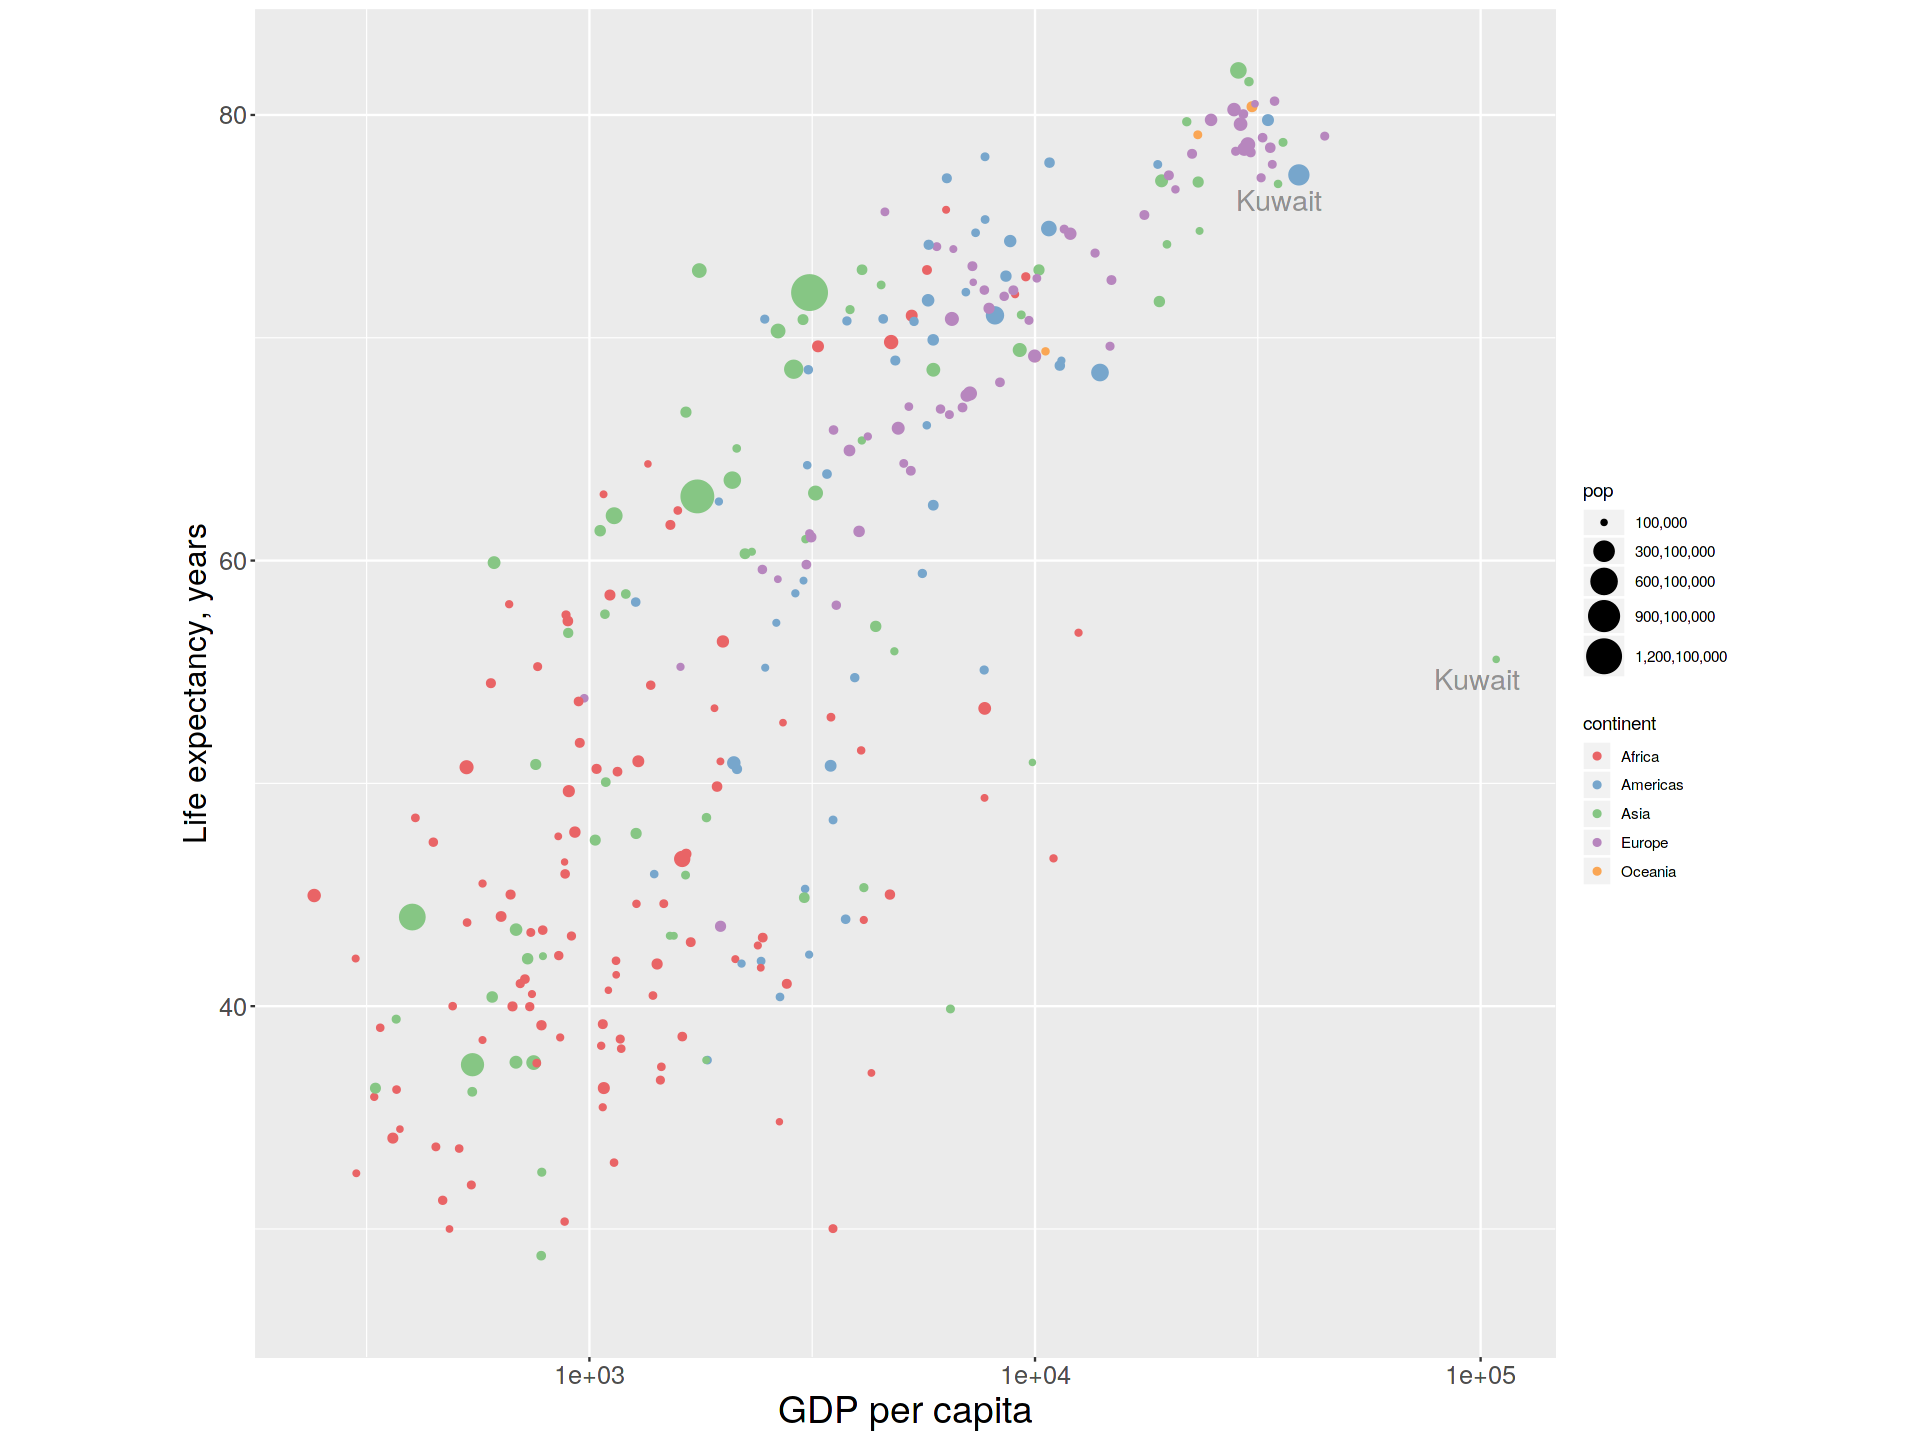

In [129]:
# prepare 1952 geom


# color points by continent and size points by population
p1952 = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p1952 = p1952 + geom_point()


# set scales like in the example
p1952 = p1952 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)



# fix the y-axis by setting a range
p1952 = p1952 + ylim(c(27, 82))



# set the x-axis to a log-scale
p1952 = p1952 + scale_x_log10()



# customize the x axis and y axis labels
p1952 = p1952 + labs(x = "GDP per capita", y = "Life expectancy, years")




# improve geom to label Kuwait by adding text repel
p1952 = p1952 + geom_text_repel(aes(label=ifelse(nfdf.both$country == "Kuwait",nfdf.both$country,'')), 
                        size= 6, segment.size = 5, segment.color = 'gray57', color='gray57', show.legend=FALSE)
p1952 = p1952 + theme(strip.background = element_blank())





# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654



# add colors for points
p1952 = p1952 + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))




# increase axis titles

p1952 = p1952 + theme(axis.title.y = element_text(size = rel(1.7), angle = 90))
p1952 = p1952 + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))



# increase size of the text on the labels
p1952 = p1952 + theme(axis.text.x = element_text(size = rel(1.7), angle = 0))
p1952 = p1952 + theme(axis.text.y = element_text(size = rel(1.7), angle = 0))





# fix aspect ratio to make square plots

p1952 = p1952 + coord_fixed(ratio = 1/20)
p1952




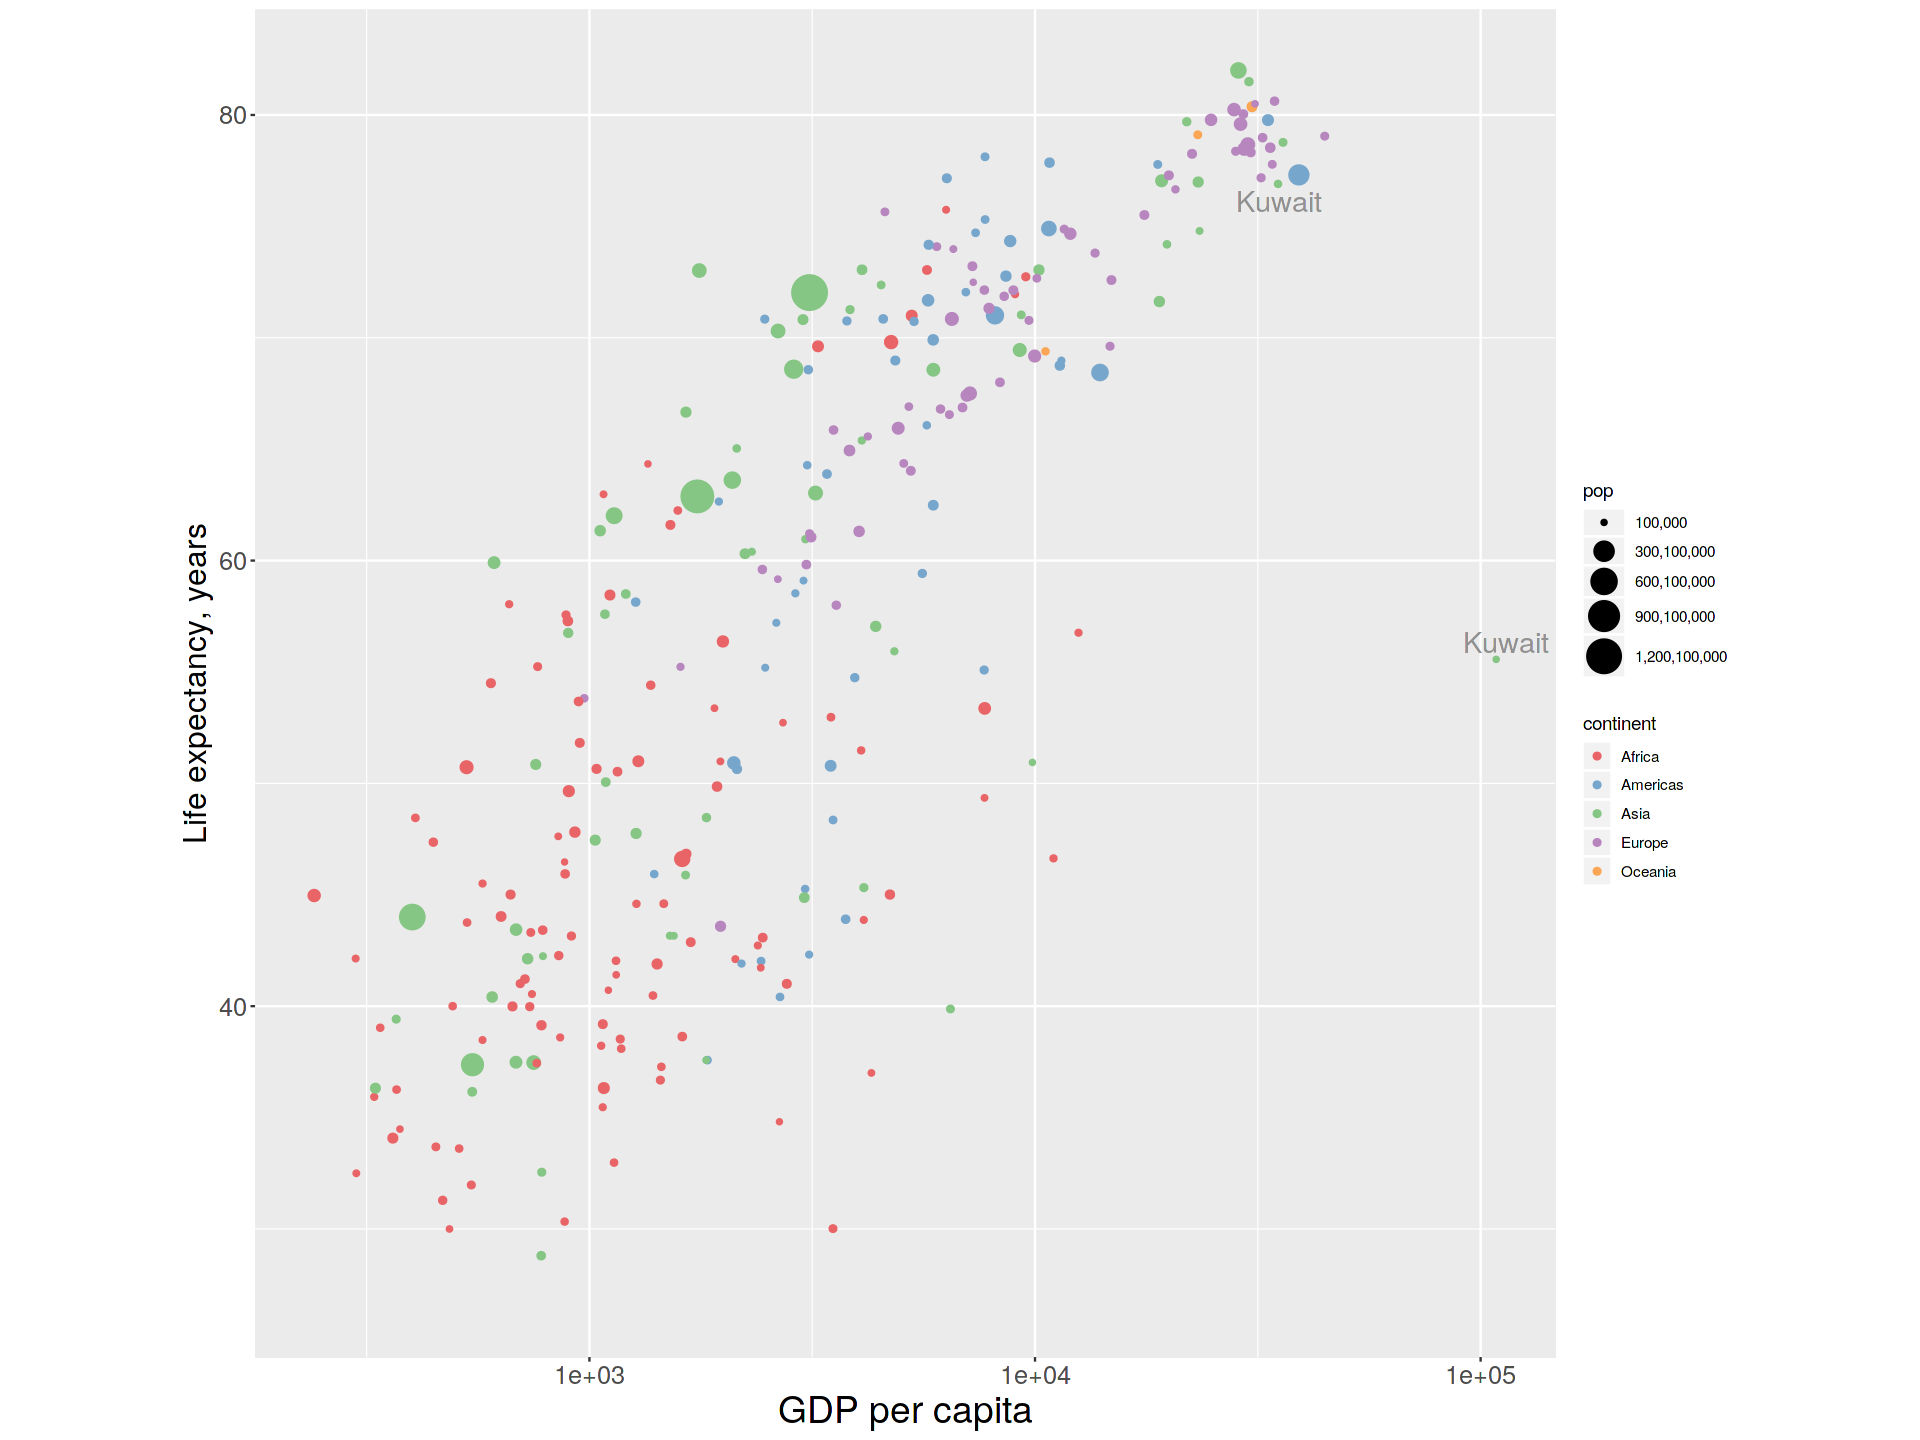

In [130]:
# prepare 1952 geom


# color points by continent and size points by population
p1952 = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p1952 = p1952 + geom_point()


# set scales like in the example
p1952 = p1952 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)



# fix the y-axis by setting a range
p1952 = p1952 + ylim(c(27, 82))



# set the x-axis to a log-scale
p1952 = p1952 + scale_x_log10()



# customize the x axis and y axis labels
p1952 = p1952 + labs(x = "GDP per capita", y = "Life expectancy, years")




# improve geom to label Kuwait by adding text repel
p1952 = p1952 + geom_text_repel(aes(label=ifelse(nfdf.both$country == "Kuwait",nfdf.both$country,'')), 
                        size= 6, segment.size = 5, segment.color = 'gray57', color='gray57', show.legend=FALSE)
p1952 = p1952 + theme(strip.background = element_blank())





# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654



# add colors for points
p1952 = p1952 + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))




# increase axis titles

p1952 = p1952 + theme(axis.title.y = element_text(size = rel(1.7), angle = 90))
p1952 = p1952 + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))



# increase size of the text on the labels
p1952 = p1952 + theme(axis.text.x = element_text(size = rel(1.7), angle = 0))
p1952 = p1952 + theme(axis.text.y = element_text(size = rel(1.7), angle = 0))





# fix aspect ratio to make square plots

p1952 = p1952 + coord_fixed(ratio = 1/20)
p1952




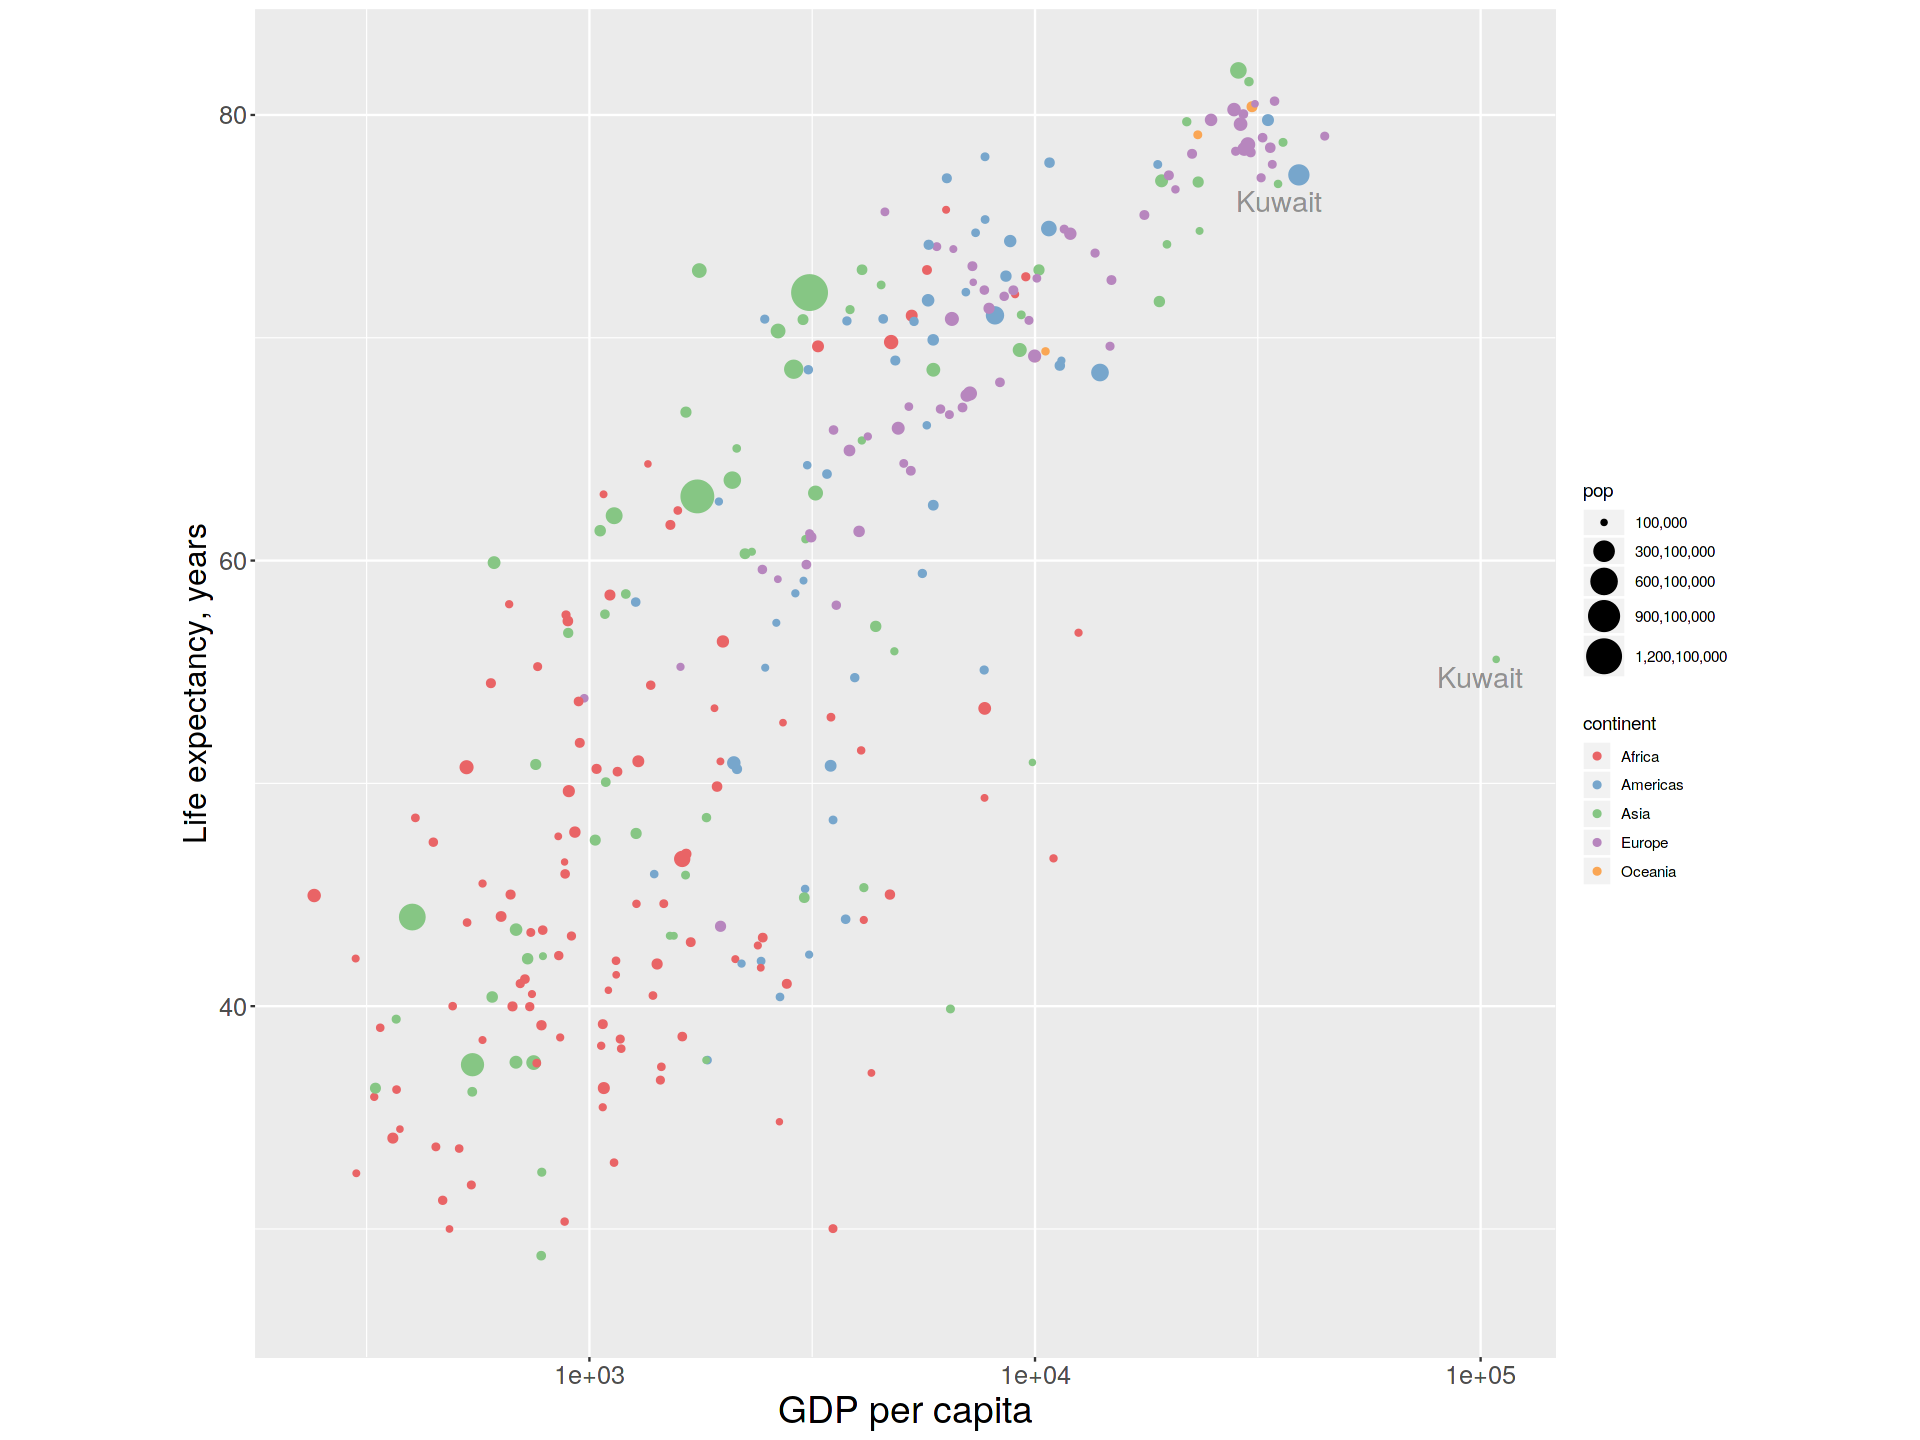

In [131]:
# prepare 2002 geom


# color points by continent and size points by population
p2002 = ggplot(nfdf.both, aes(x = gdpPercap, y = lifeExp, color=continent, size=pop))
p2002 = p2002 + geom_point()


# set scales like in the example
p2002 = p2002 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)



# fix the y-axis by setting a range
p2002 = p2002 + ylim(c(27, 82))



# set the x-axis to a log-scale
p2002 = p2002 + scale_x_log10()



# customize the x axis and y axis labels
p2002 = p2002 + labs(x = "GDP per capita", y = "Life expectancy, years")




# improve geom to label Kuwait by adding text repel
p2002 = p2002 + geom_text_repel(aes(label=ifelse(nfdf.both$country == "Kuwait",nfdf.both$country,'')), 
                        size= 6, segment.size = 5, segment.color = 'gray57', color='gray57', show.legend=FALSE)
p2002 = p2002 + theme(strip.background = element_blank())





# color scale manually
# get rgb values then convert to hex

#                Red   Green   Blue

# Africa        233    100      102    #E96466
# Americas      119   166       204    #77A6CC
# Asia          134   198       132    #86C684  
# Europe        183   134       190    #B786BE
# Oceania       250   166       084    #FAA654



# add colors for points
p2002 = p2002 + scale_color_manual(values = c('#E96466',
                                      '#77A6CC',
                                      '#86C684',
                                      '#B786BE',
                                      '#FAA654'))




# increase axis titles

p2002 = p2002 + theme(axis.title.y = element_text(size = rel(1.7), angle = 90))
p2002 = p2002 + theme(axis.title.x = element_text(size = rel(2.0), angle = 0))



# increase size of the text on the labels
p2002 = p2002 + theme(axis.text.x = element_text(size = rel(1.7), angle = 0))
p2002 = p2002 + theme(axis.text.y = element_text(size = rel(1.7), angle = 0))





# fix aspect ratio to make square plots

p2002 = p2002 + coord_fixed(ratio = 1/20)
p2002




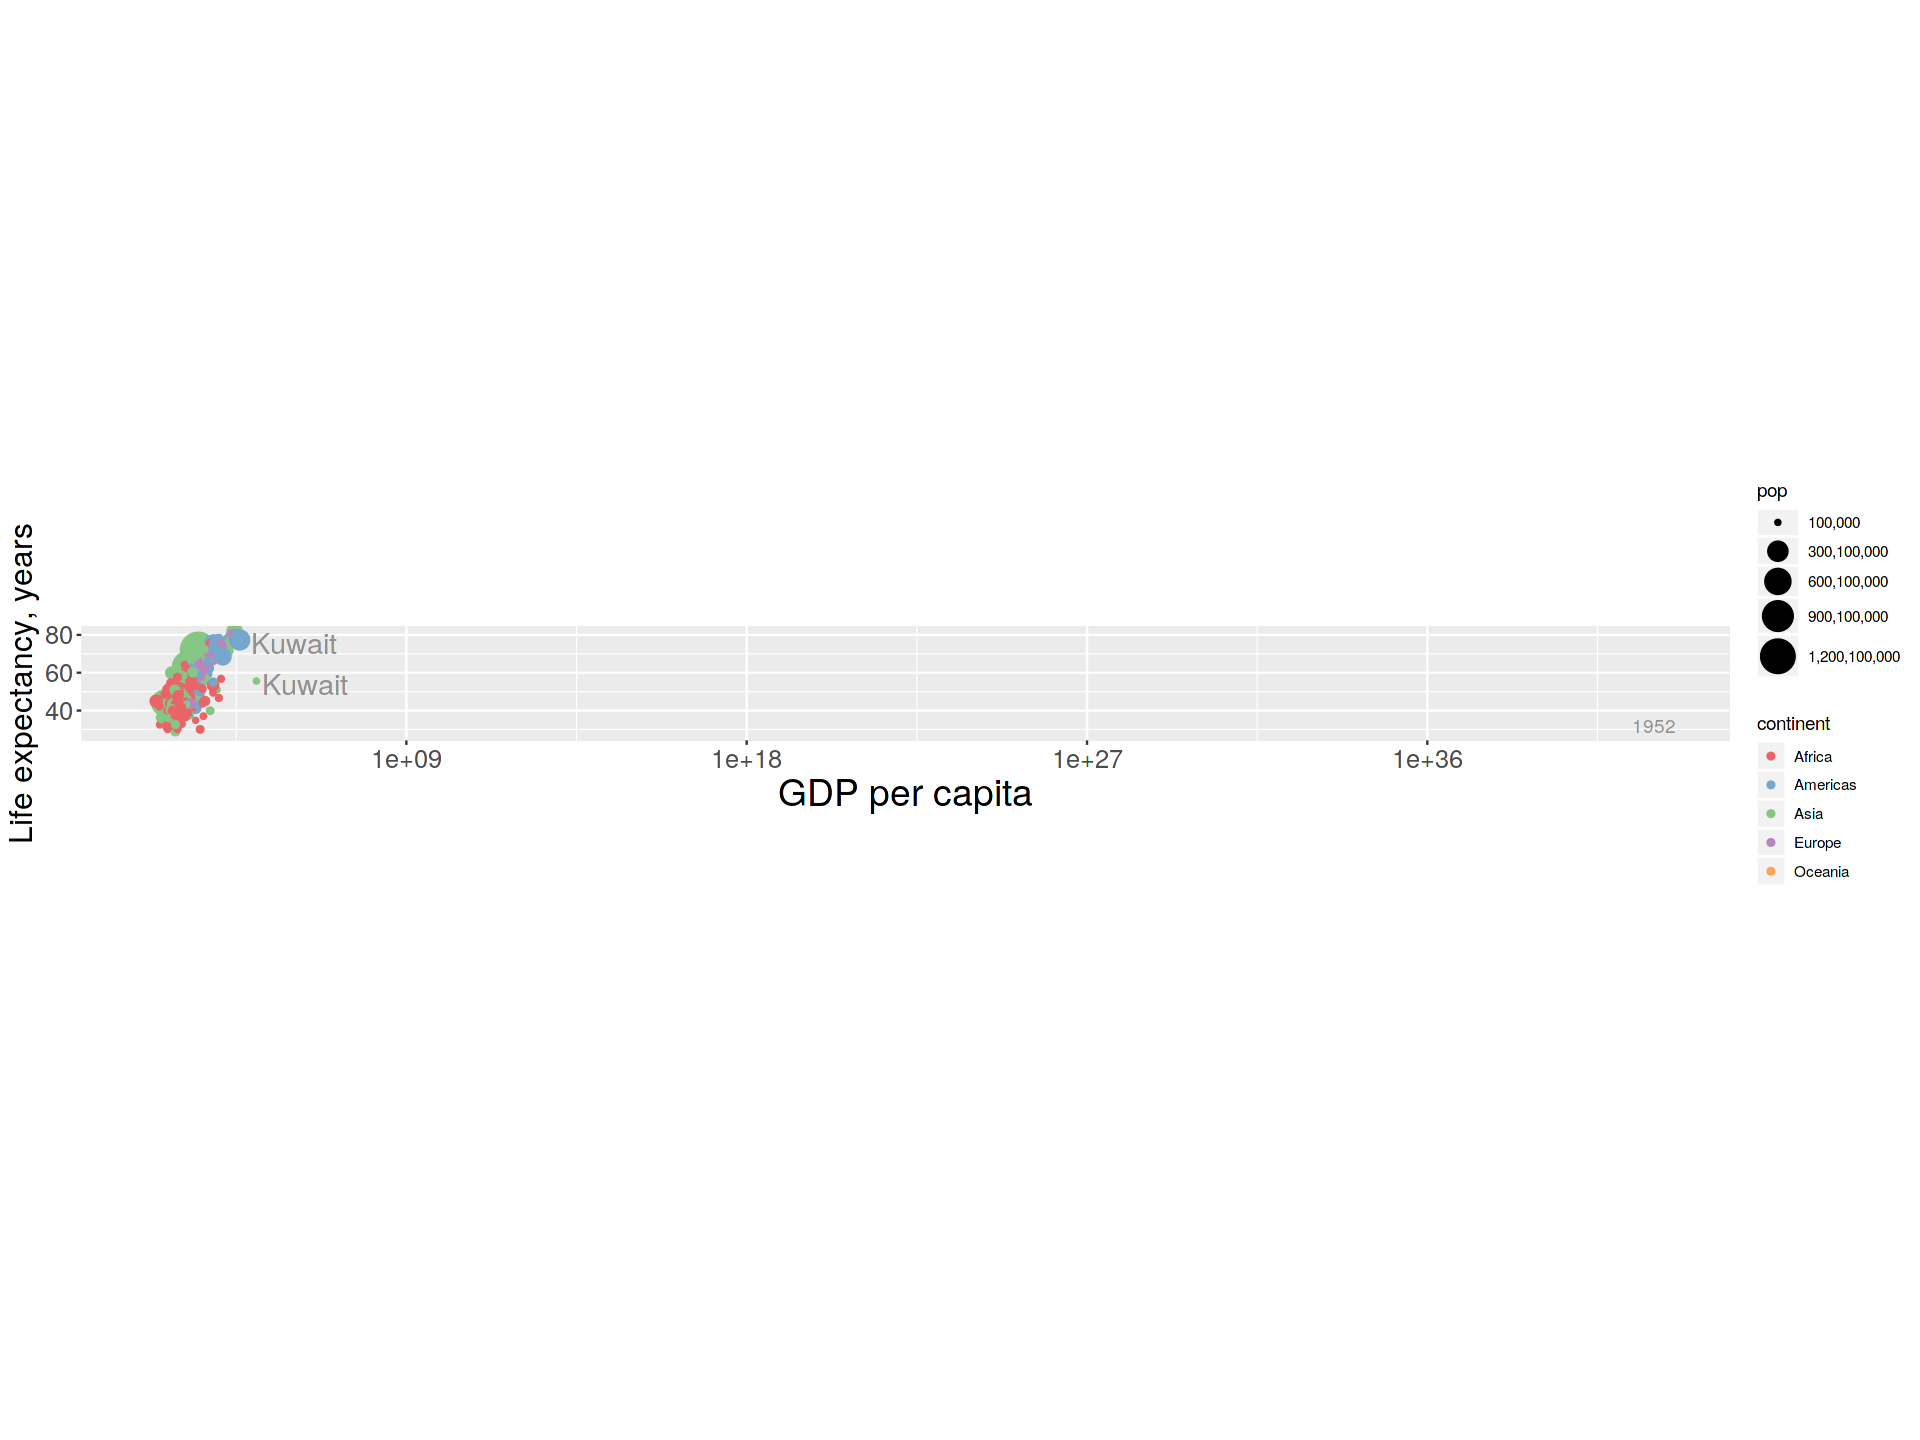

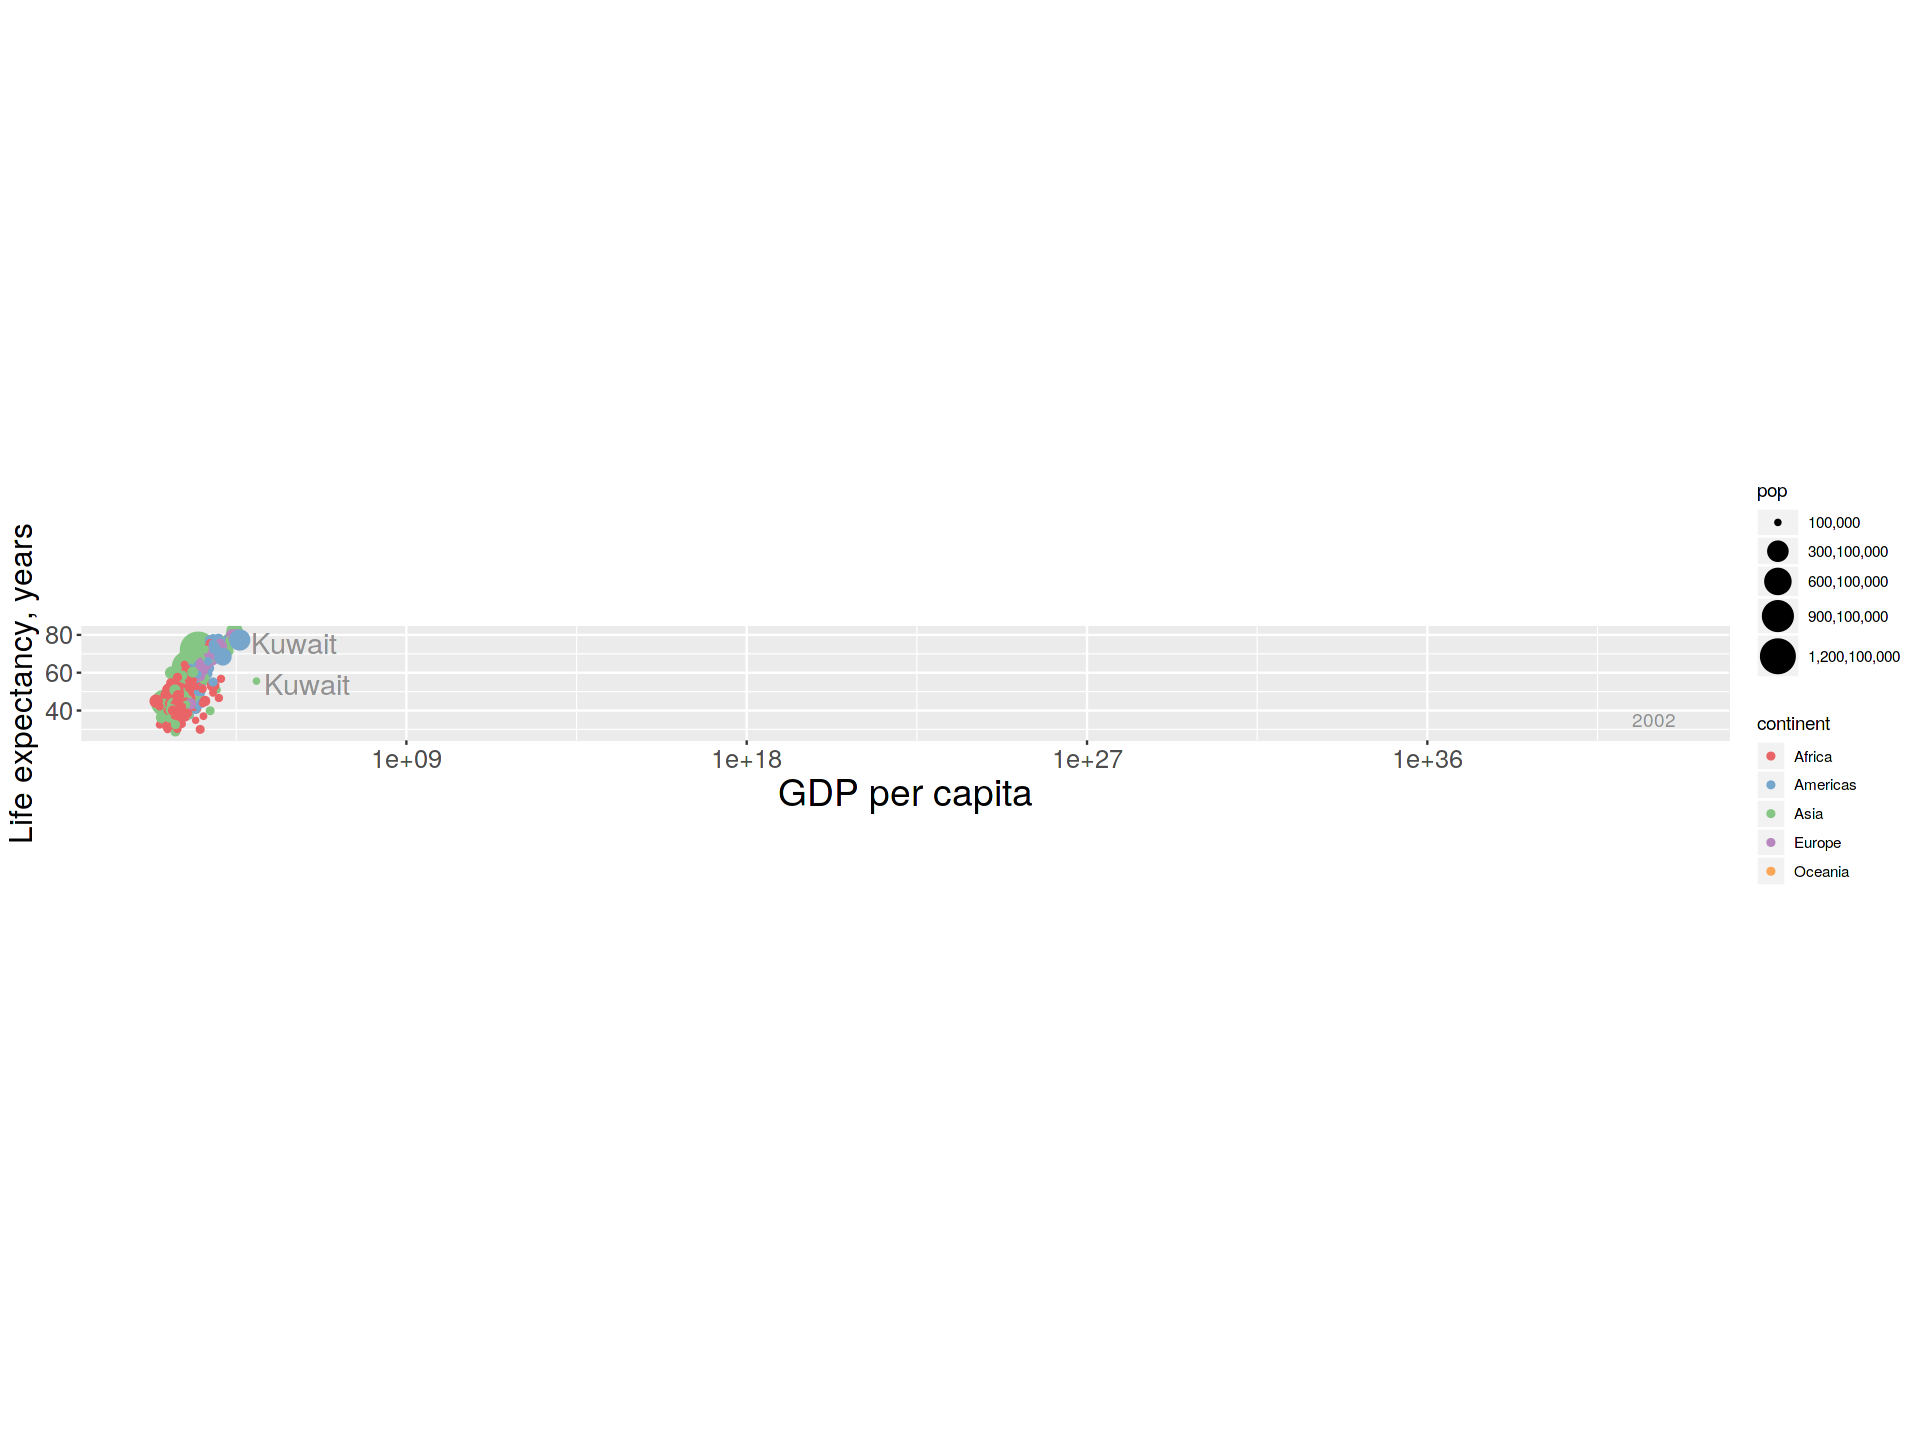

In [132]:
# annotate the geoms, but again, it still messes them up

oldp1952 = p1952 + annotate("text", x = 1e+042, y = 32, label = "1952", color="gray57")
oldp1952

oldp2002 = p2002 + annotate("text", x = 1e+042, y = 35, label = "2002", color="gray57")
oldp2002

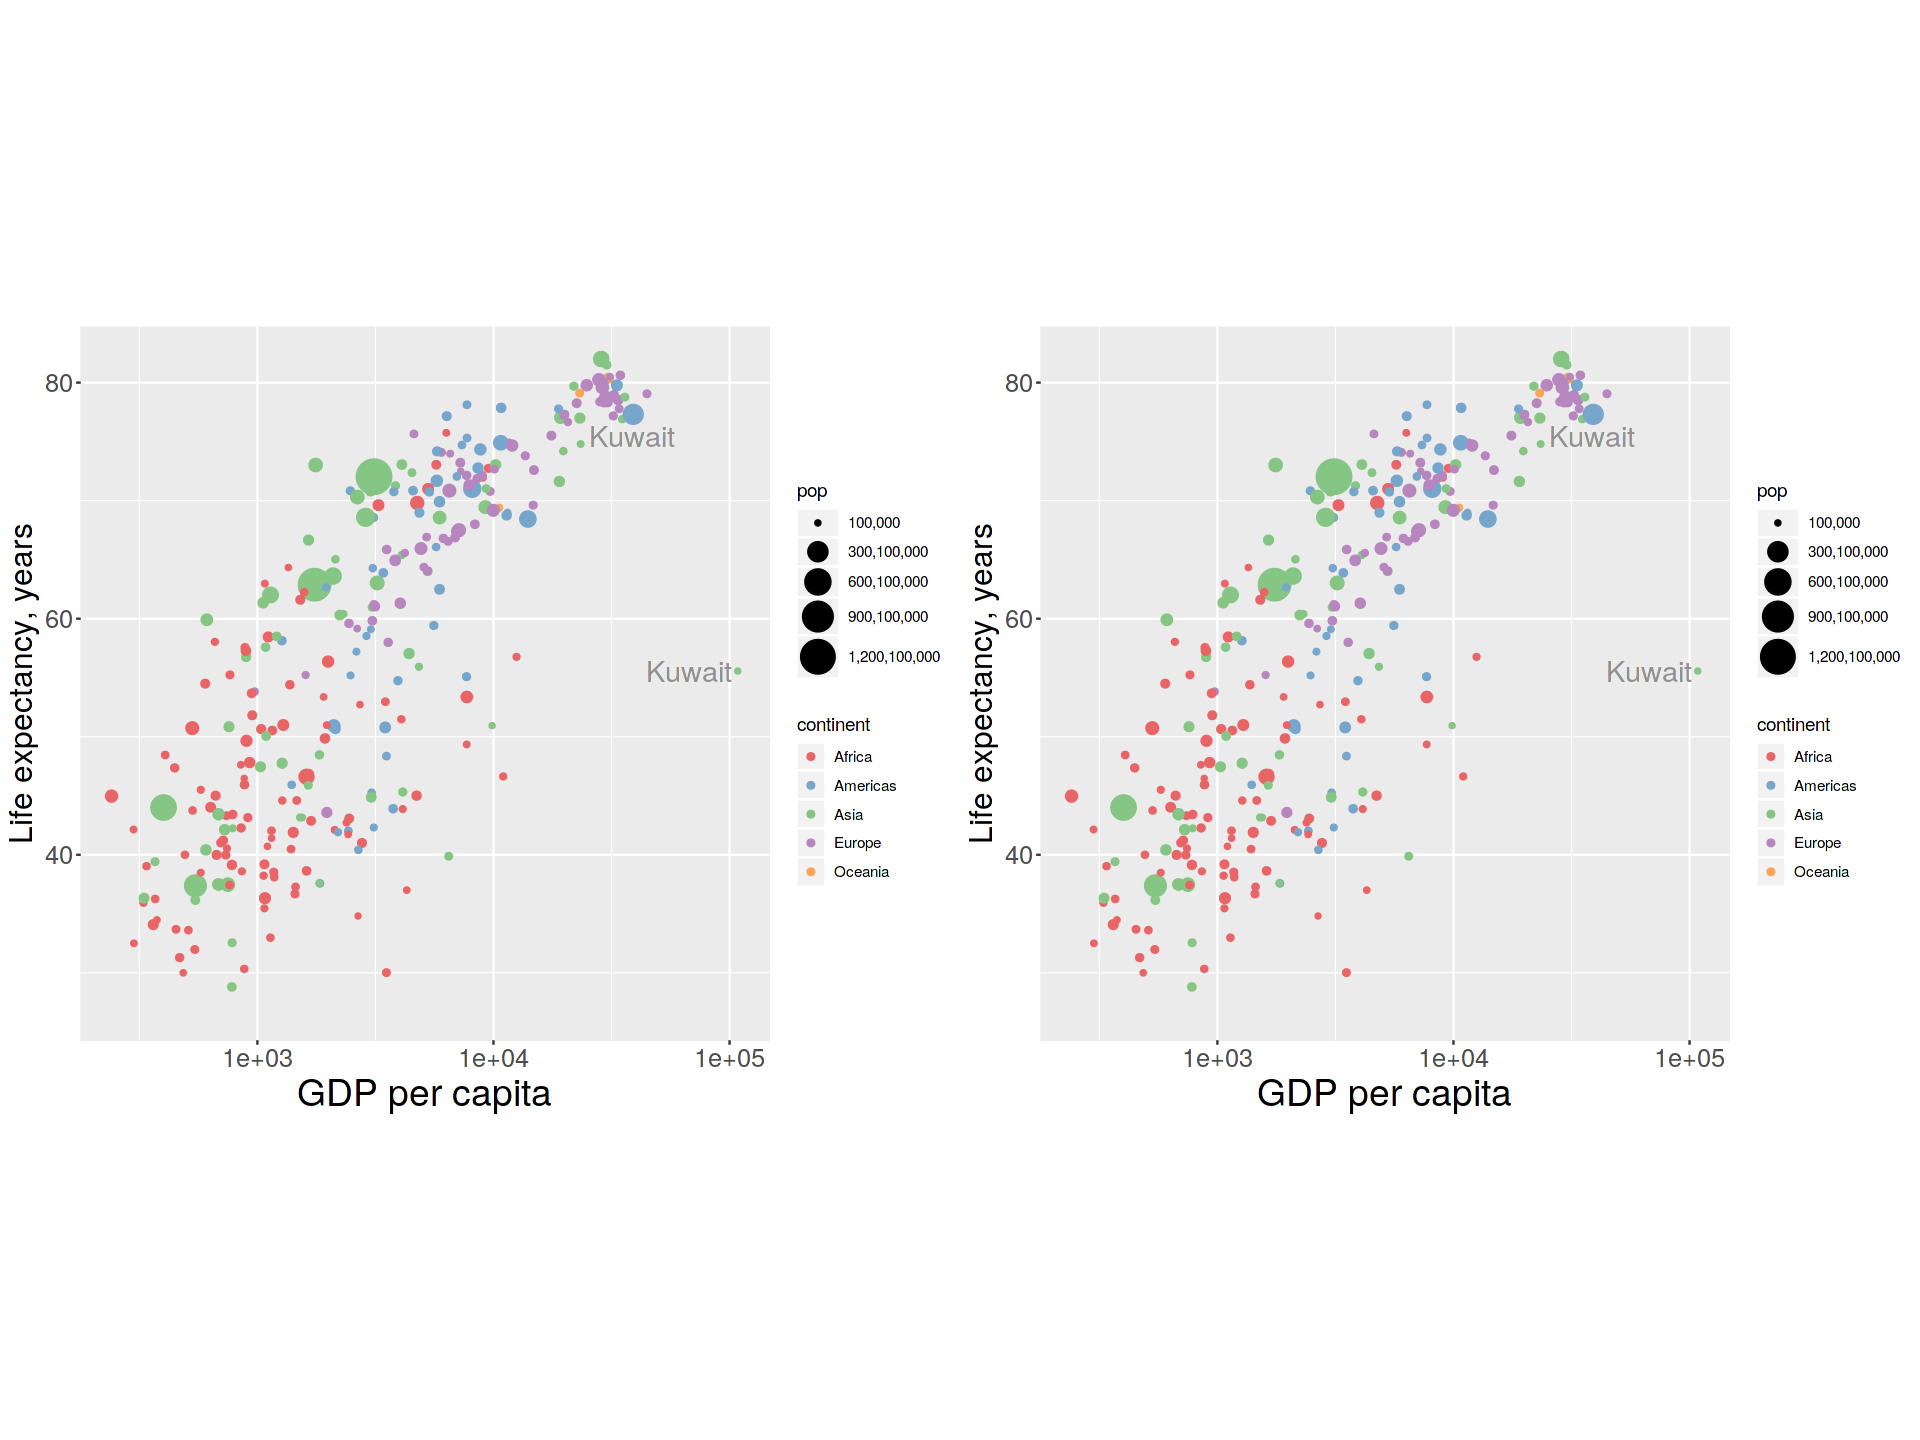

In [133]:
# place geoms side by side and leave off the annotation

p1952 + p2002 + patchwork::plot_layout(nrow = 1)

Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!